### Introduction

- The dataset contains transactions made by credit cards in September 2013 by European cardholders.   

- It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, it is not  provide the original features and more background information about the data.     

- Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.       

- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 

- The feature 'Amount' is the transaction Amount. 

- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In this kernel I will use predictive models to detect whether a transaction is a normal payment or a fraud.


### Note
Don't use accuracy score as a metric with imbalanced datasets (will be usually high and misleading), instead use f1-score, precision/recall score or confusion matrix.         

Consider a dataset for detecting fraudulent transactions where only 1% of transactions are fraudulent (positive class). If a model predicts all transactions as non-fraudulent (negative class), the accuracy will be 99%, but it will fail to identify any fraudulent transactions.


In machine learning, oversampling and undersampling are techniques used to address class imbalance in a dataset.


1. Oversampling  

Oversampling involves increasing the number of instances in the minority class to match or approach the number of instances in the majority class. This can be done by duplicating existing minority class instances or by generating synthetic data.

- Techniques for Oversampling:

- Random Oversampling: Randomly duplicates instances from the minority class.  

- Synthetic Minority Over-sampling Technique (SMOTE): Generates synthetic instances 

- ADASYN (Adaptive Synthetic Sampling): An extension of SMOTE that generates synthetic samples more adaptively, focusing on difficult-to-learn examples.



2. Undersampling

Undersampling involves reducing the number of instances in the majority class. This can be done by randomly removing instances or by using more sophisticated methods to retain representative samples.

- Techniques for Undersampling:

- Random Undersampling: Randomly removes instances from the majority class.      

- NearMiss: Selects instances from the majority class that are closest to the minority class instances.      

- Cluster Centroids: Uses clustering to reduce the number of instances in the majority class by replacing clusters with their centroids.


## 📌 0. Import Packages

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

/Users/atefeh/miniconda3/envs/tf2/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 📥 1. Data Preparation


### 1.1 Import csv file

In [3]:
# Load Data
pd.set_option('display.max_columns',None)
data = pd.read_csv('creditcard.csv')
data.head(3)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0

###  1.2 Split the data

In [4]:
cc_train , cc_test = train_test_split(data, test_size=  0.2 , random_state=42)
cc_train = cc_train.reset_index(drop=True)
cc_test= cc_test.reset_index(drop=True)
print(f'Shape of train dataset : {cc_train.shape}')
print(f'Shape of test dataset : {cc_test.shape}')


Shape of train dataset : (227845, 31)
Shape of test dataset : (56962, 31)


In [5]:
# Create a copy from test and train
cc_train_copy = cc_train.copy()
cc_test_copy = cc_test.copy

###  1.3 Oversample

In [6]:
count_freq = cc_train_copy['Class'].value_counts()
percent_freq = round(cc_train_copy['Class'].value_counts(normalize=True)*100 , 2)
freq_table = pd.concat([count_freq,percent_freq],axis=1)
freq_table.index = ['Non-Fraud','Fraud']
freq_table

count  proportion
Non-Fraud  227451       99.83
Fraud         394        0.17

In [7]:
oversample = SMOTE()
x_smote , y_smote = oversample.fit_resample(cc_train_copy.loc[:,cc_train_copy.columns != 'Class'],cc_train_copy['Class'])
balanced_df=pd.concat([x_smote,y_smote],axis=1)
balanced_df['Class'].value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

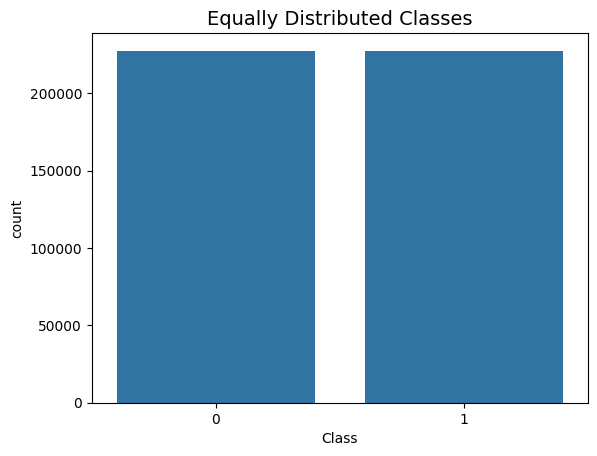

In [8]:
sns.countplot( data=balanced_df,x='Class')
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

## 🔍 2. Data Exploration

### 2.1 Glance at the data

In [9]:
pd.set_option('display.max_columns', None)
pd.DataFrame(balanced_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454902 entries, 0 to 454901
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    454902 non-null  float64
 1   V1      454902 non-null  float64
 2   V2      454902 non-null  float64
 3   V3      454902 non-null  float64
 4   V4      454902 non-null  float64
 5   V5      454902 non-null  float64
 6   V6      454902 non-null  float64
 7   V7      454902 non-null  float64
 8   V8      454902 non-null  float64
 9   V9      454902 non-null  float64
 10  V10     454902 non-null  float64
 11  V11     454902 non-null  float64
 12  V12     454902 non-null  float64
 13  V13     454902 non-null  float64
 14  V14     454902 non-null  float64
 15  V15     454902 non-null  float64
 16  V16     454902 non-null  float64
 17  V17     454902 non-null  float64
 18  V18     454902 non-null  float64
 19  V19     454902 non-null  float64
 20  V20     454902 non-null  float64
 21  V21     45

Empty DataFrame
Columns: []
Index: []

##### Understanding our data
- The dataset is highly imbalanced ! Most of the transactions are Non-Fraud (99.83%), while Fraud transactions occurs (0.17%) of the time in the dataframe.    

- To solve this problem, we can utilize both oversampling and undersampling methods. I intend to implement and compare the results of each approach, then choose the one that yields the best performance.

- It seems that there is no missing value in dataset.

- Except for the 'Class' variable, which is of type integer, the rest of the variables are of type float64.

- It seems that all the features went through a PCA transformation except for time and amount
we know that in order to implement a PCA transformation features need to be scaled. (In this case, all the V features have been scaled and we need to scale Time and Amount.)

### 2.2 Univariate analysis

For this section, I'd like to analyze the distribution of each column, provide a description of each, and extract insights from the variables.

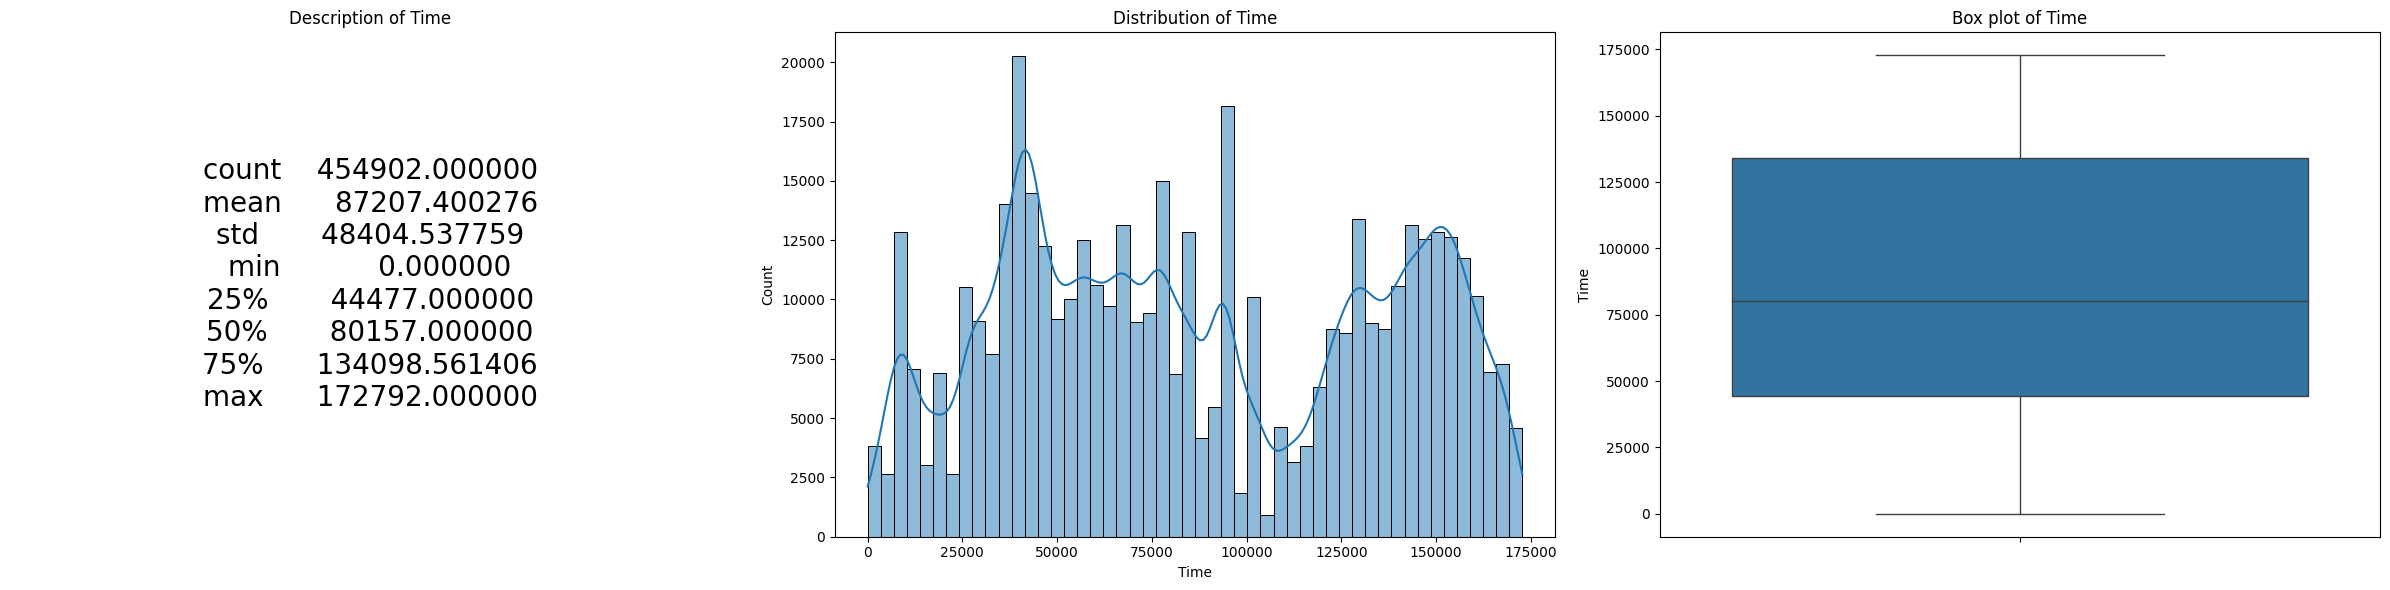

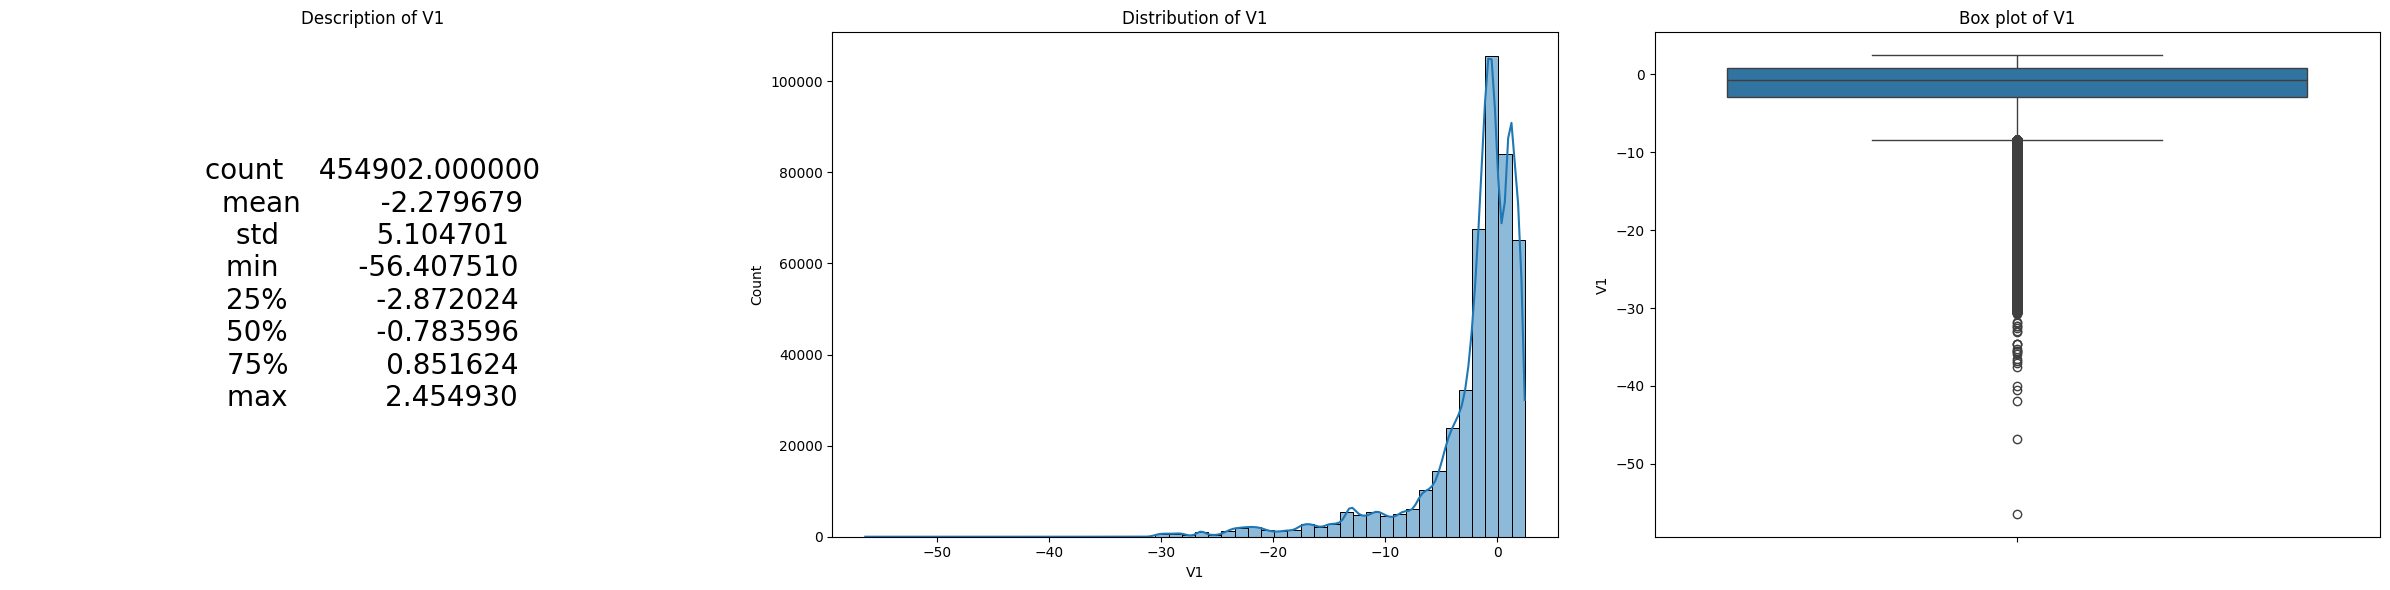

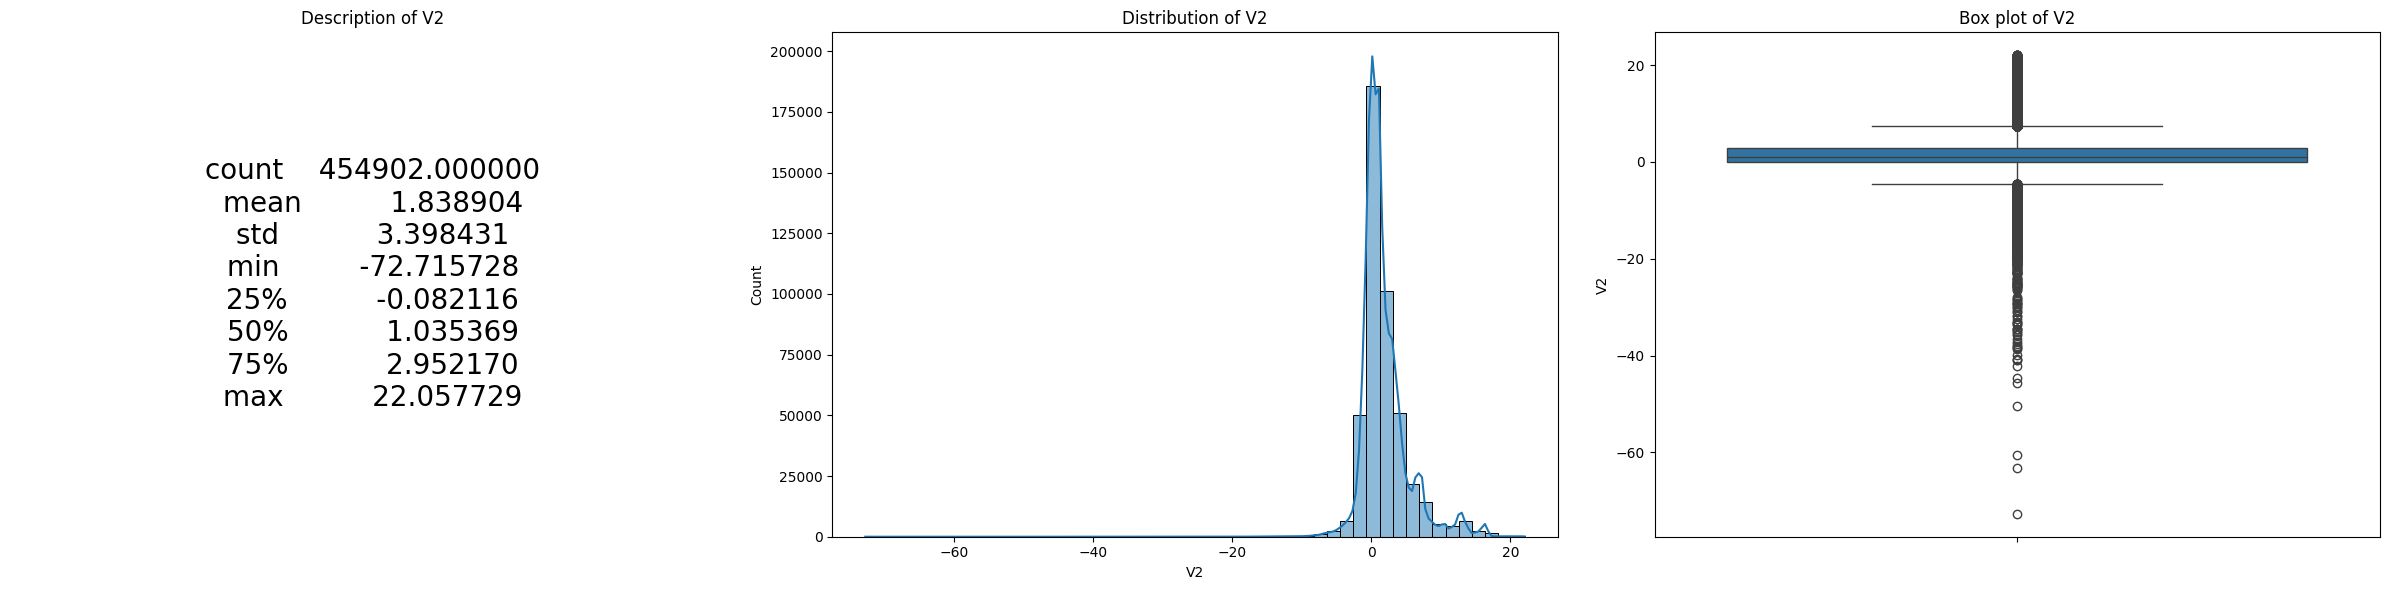

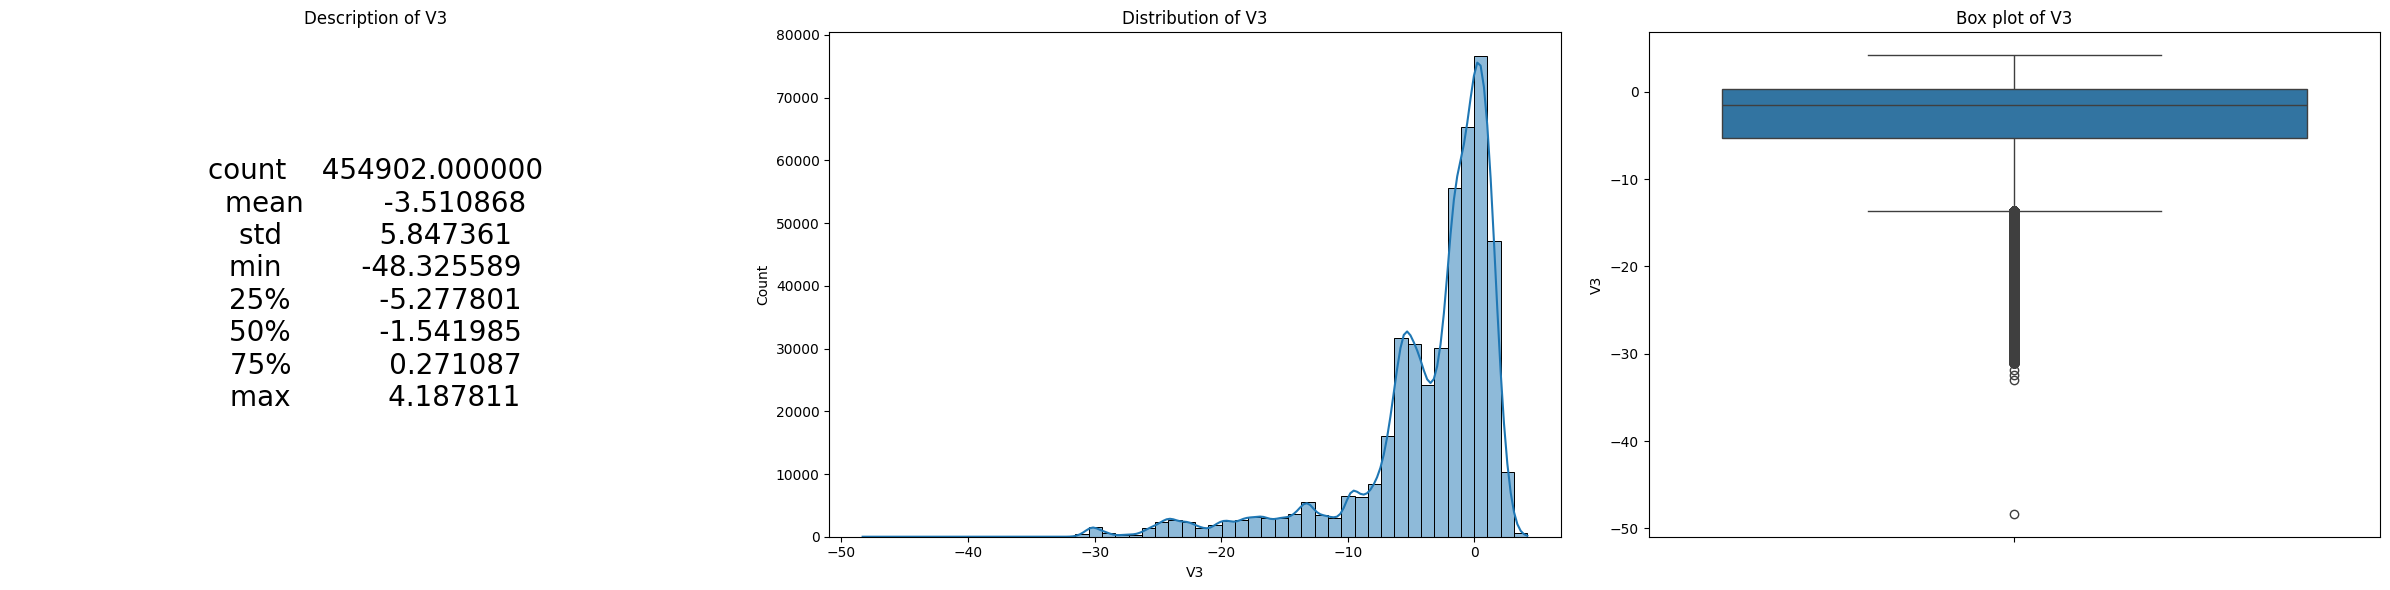

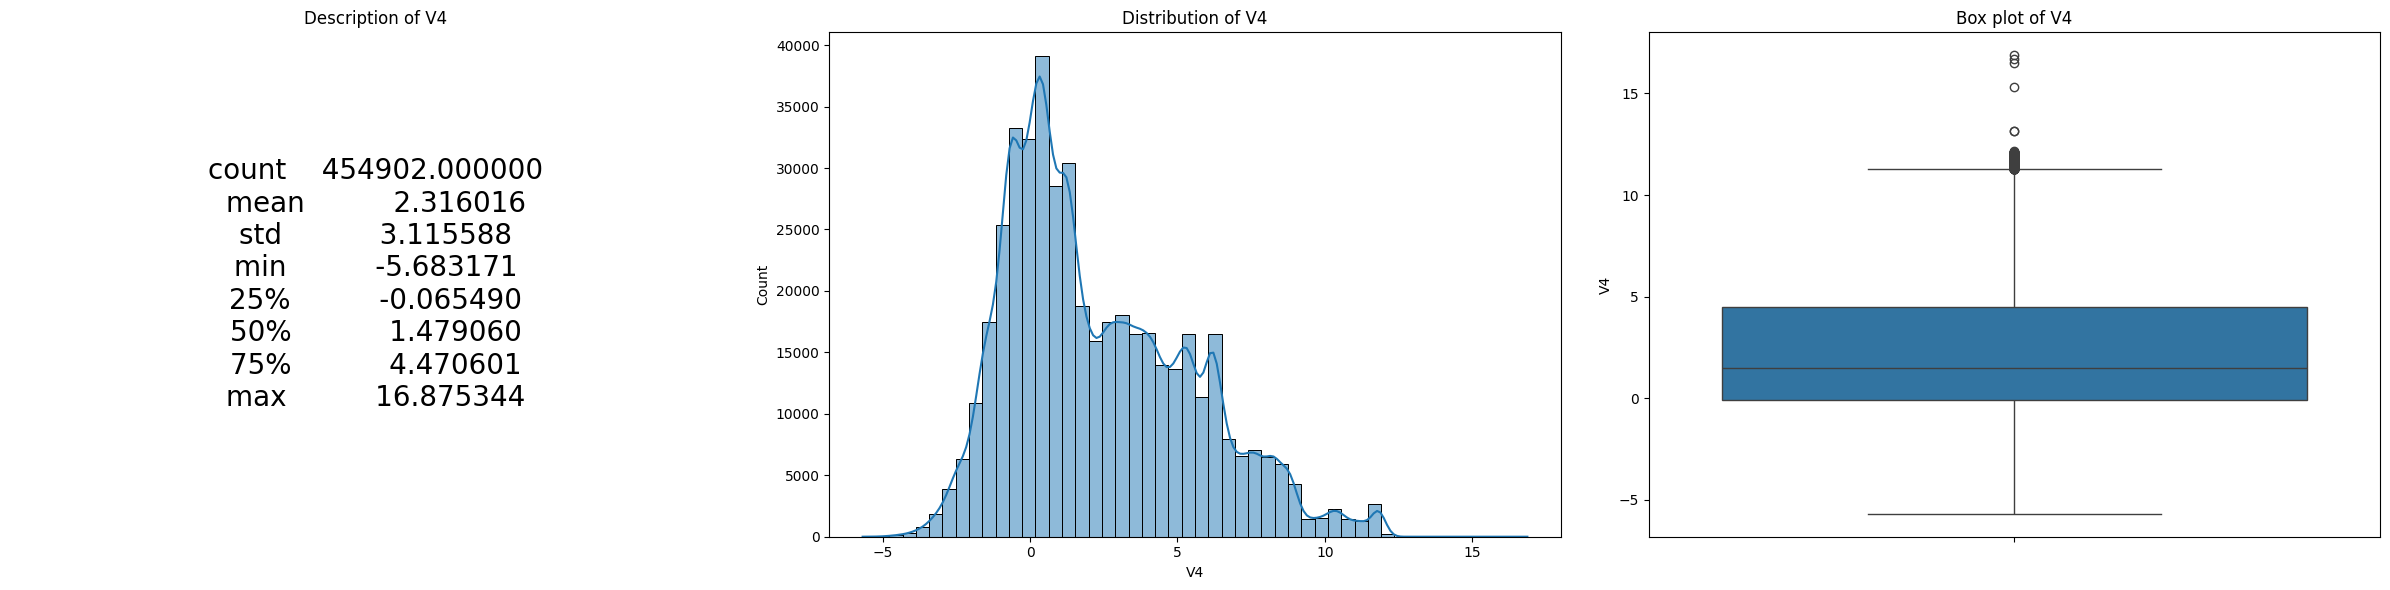

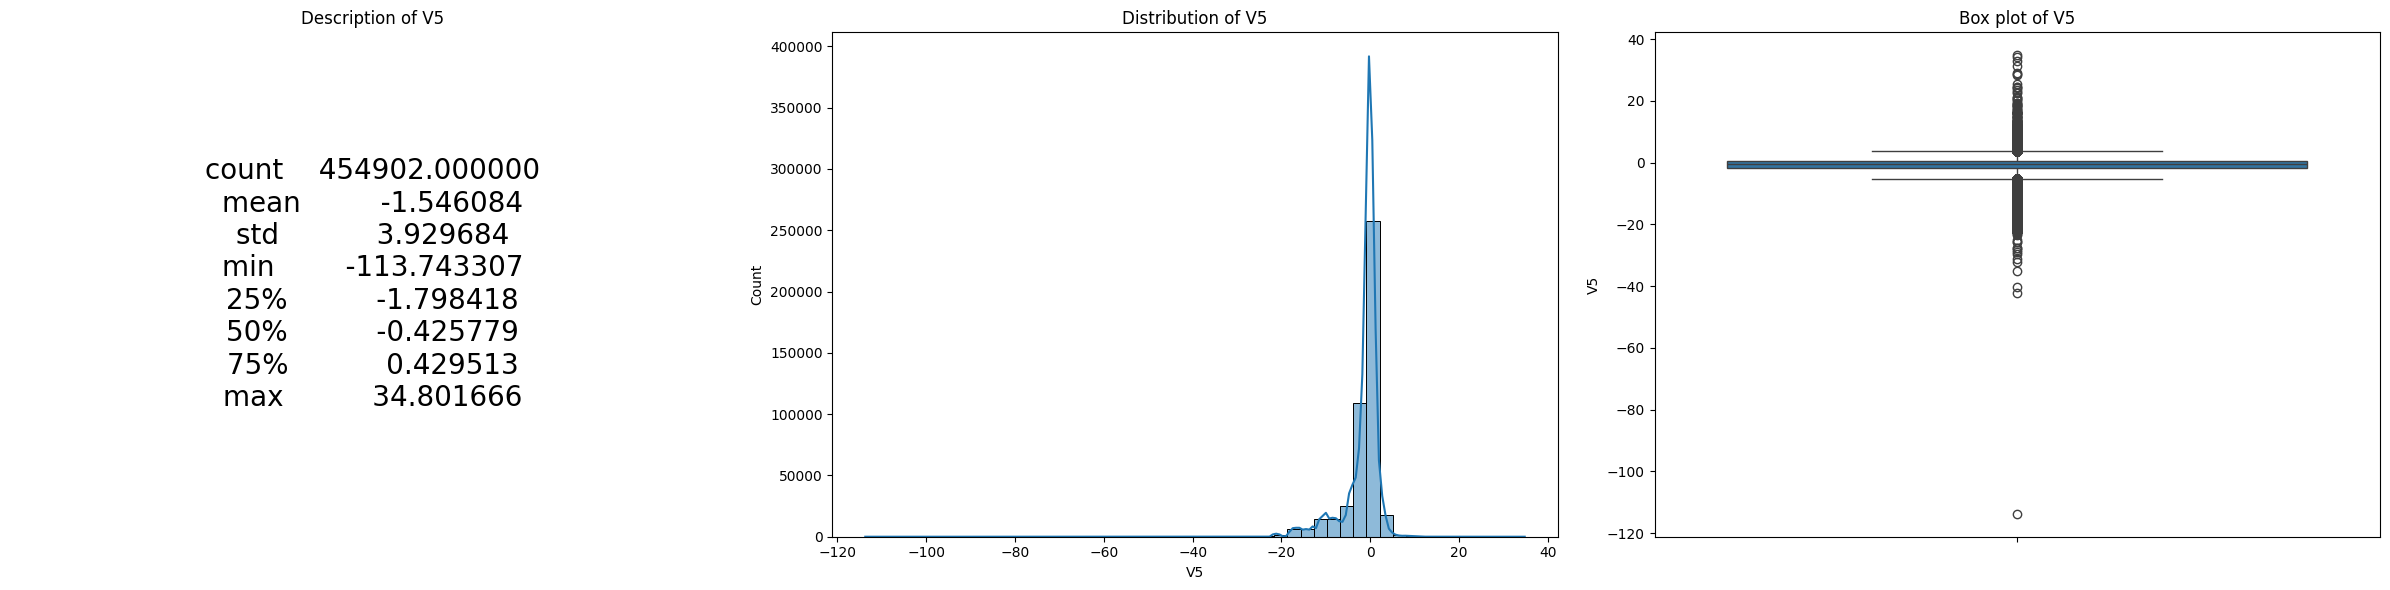

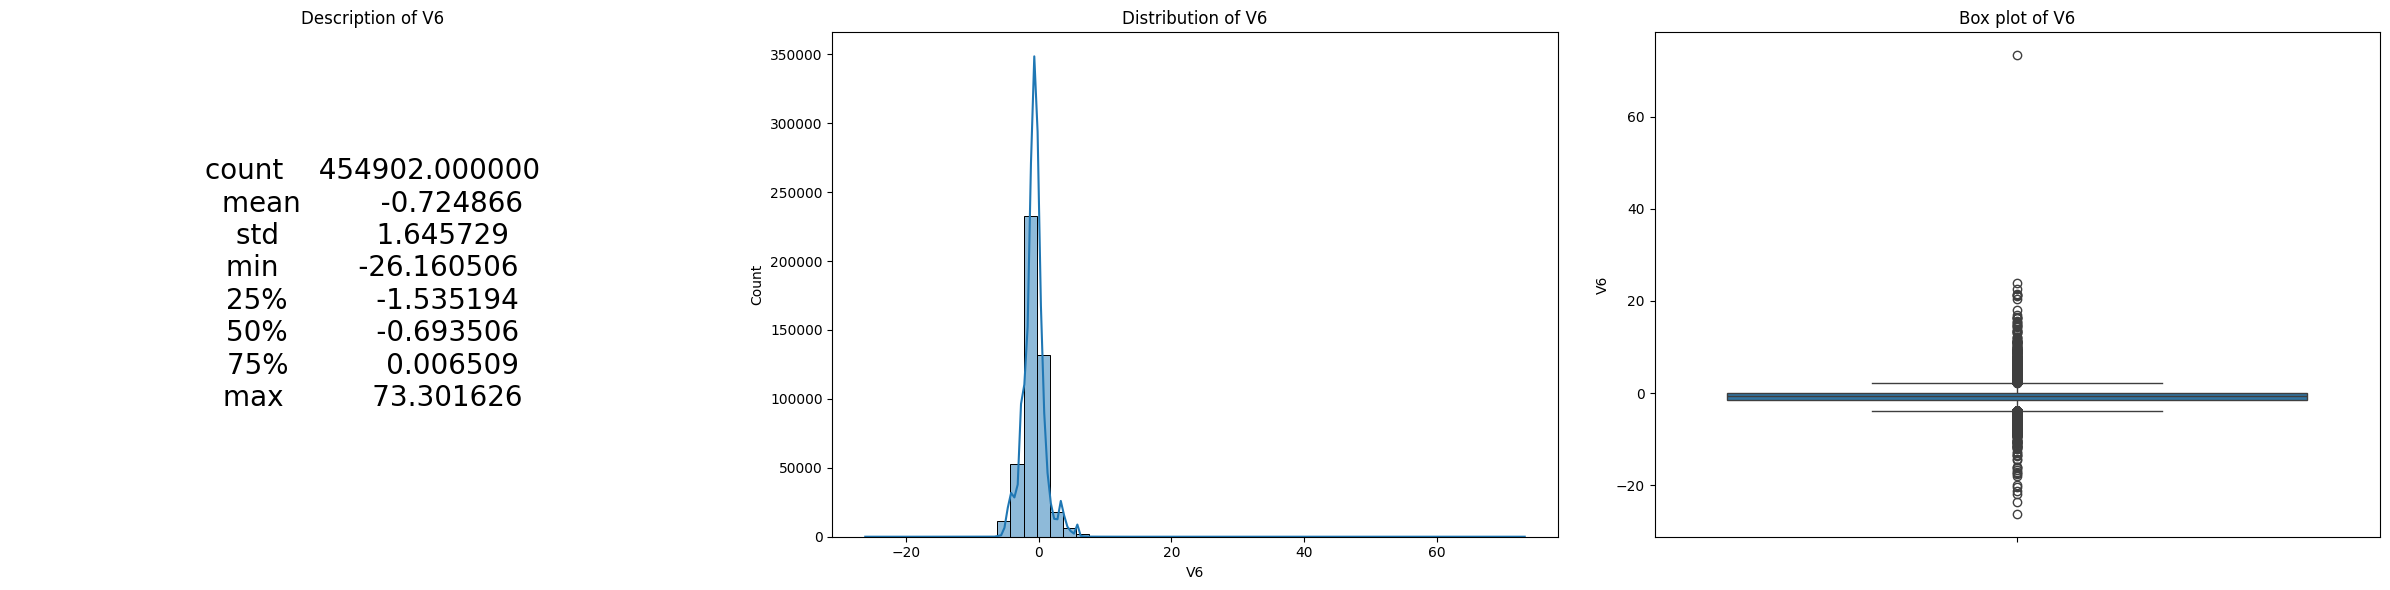

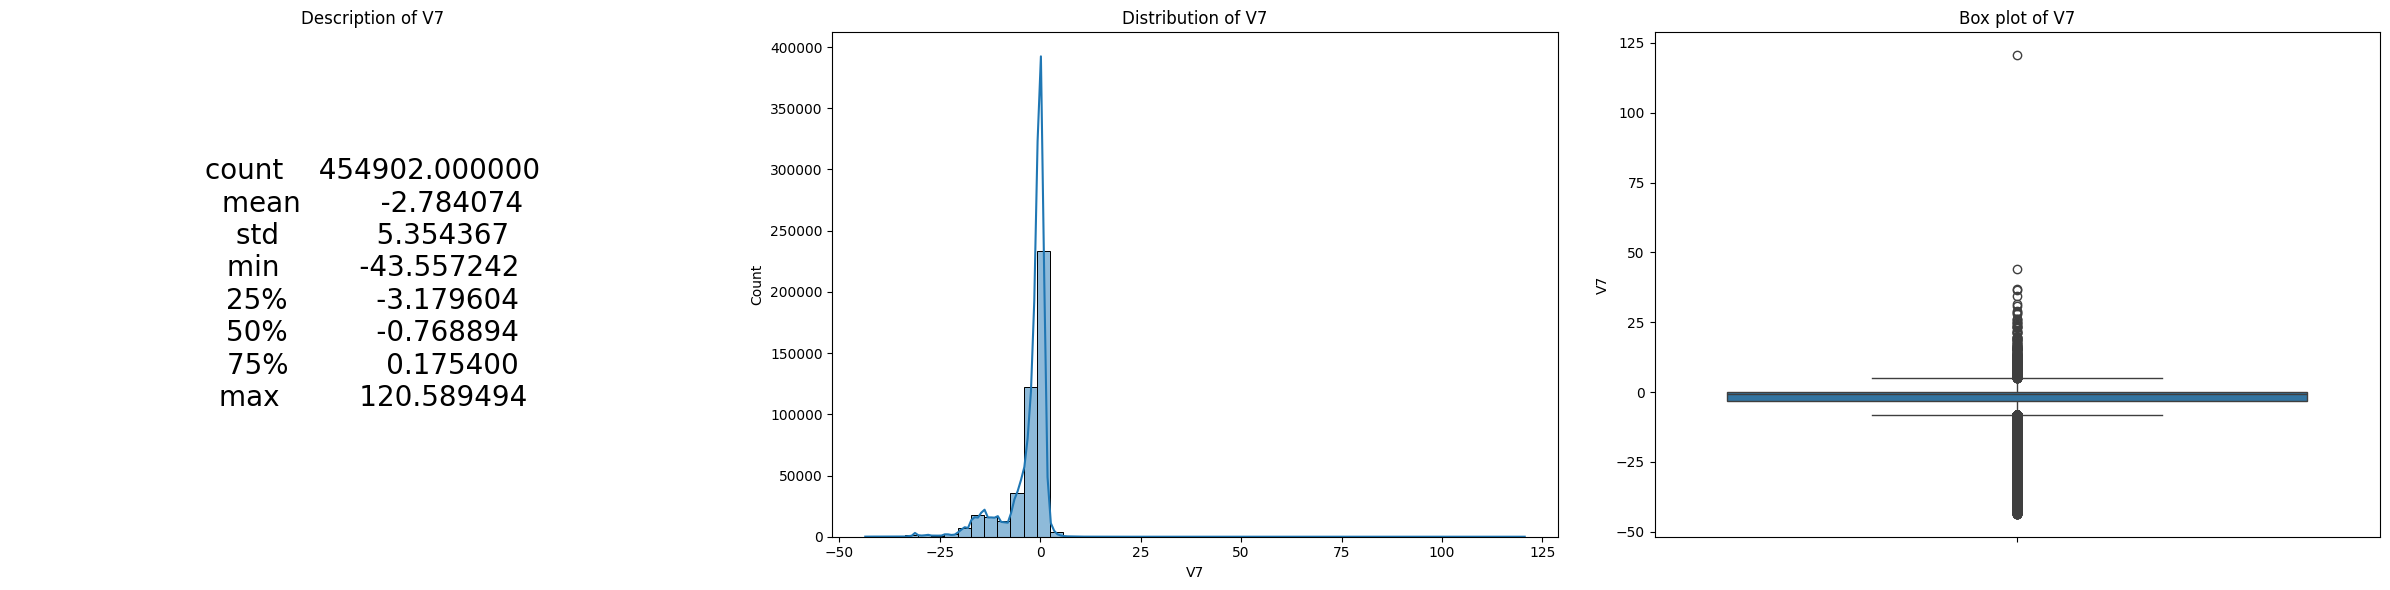

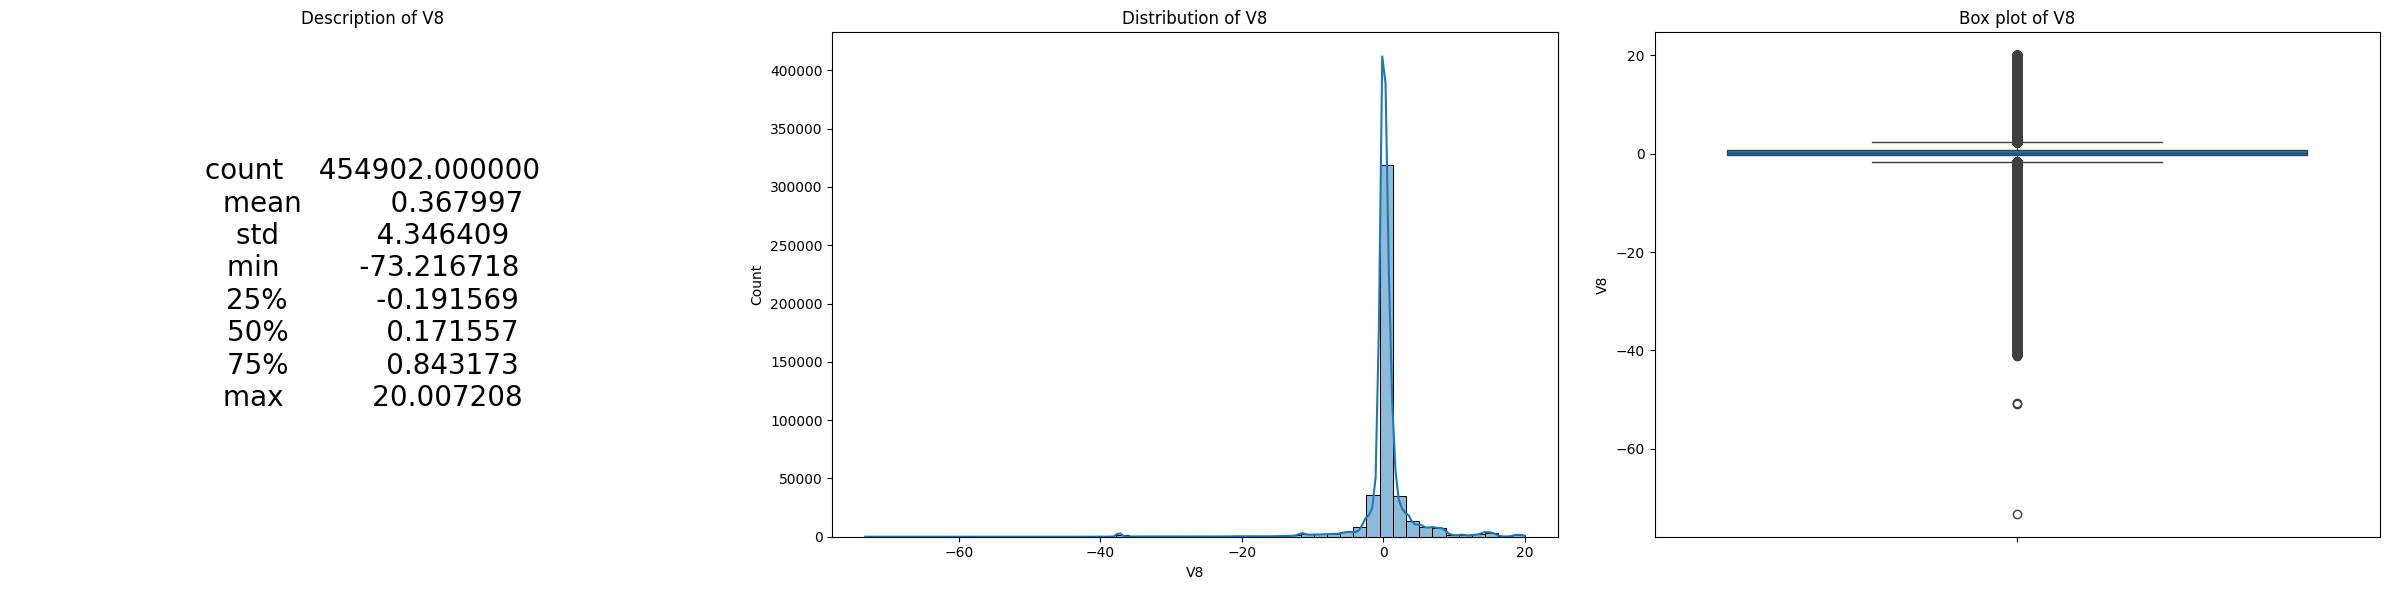

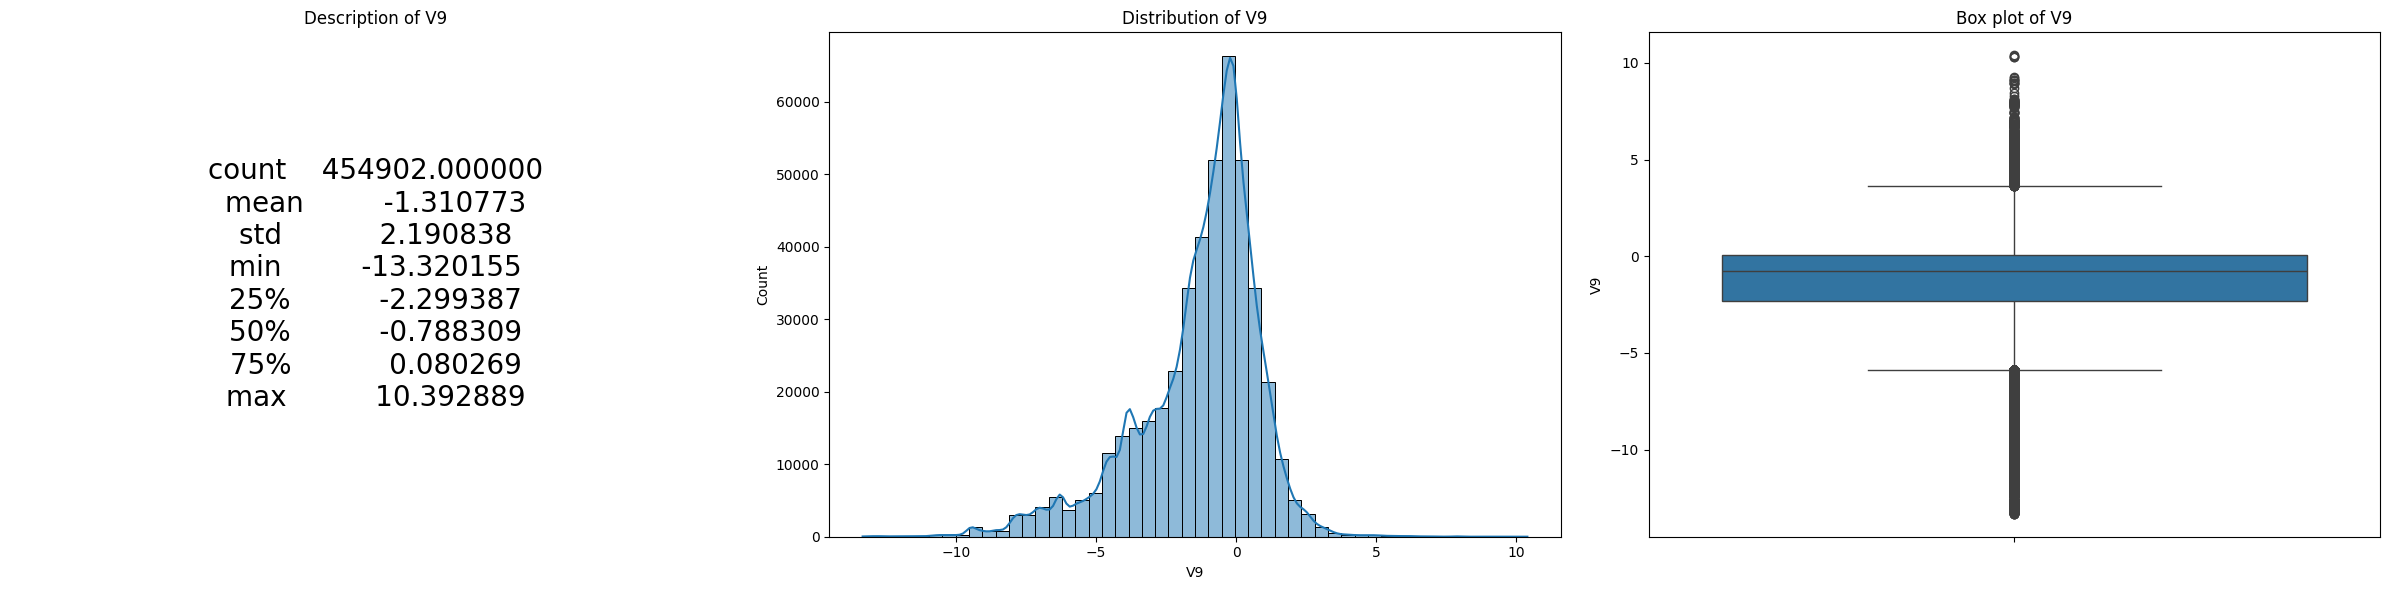

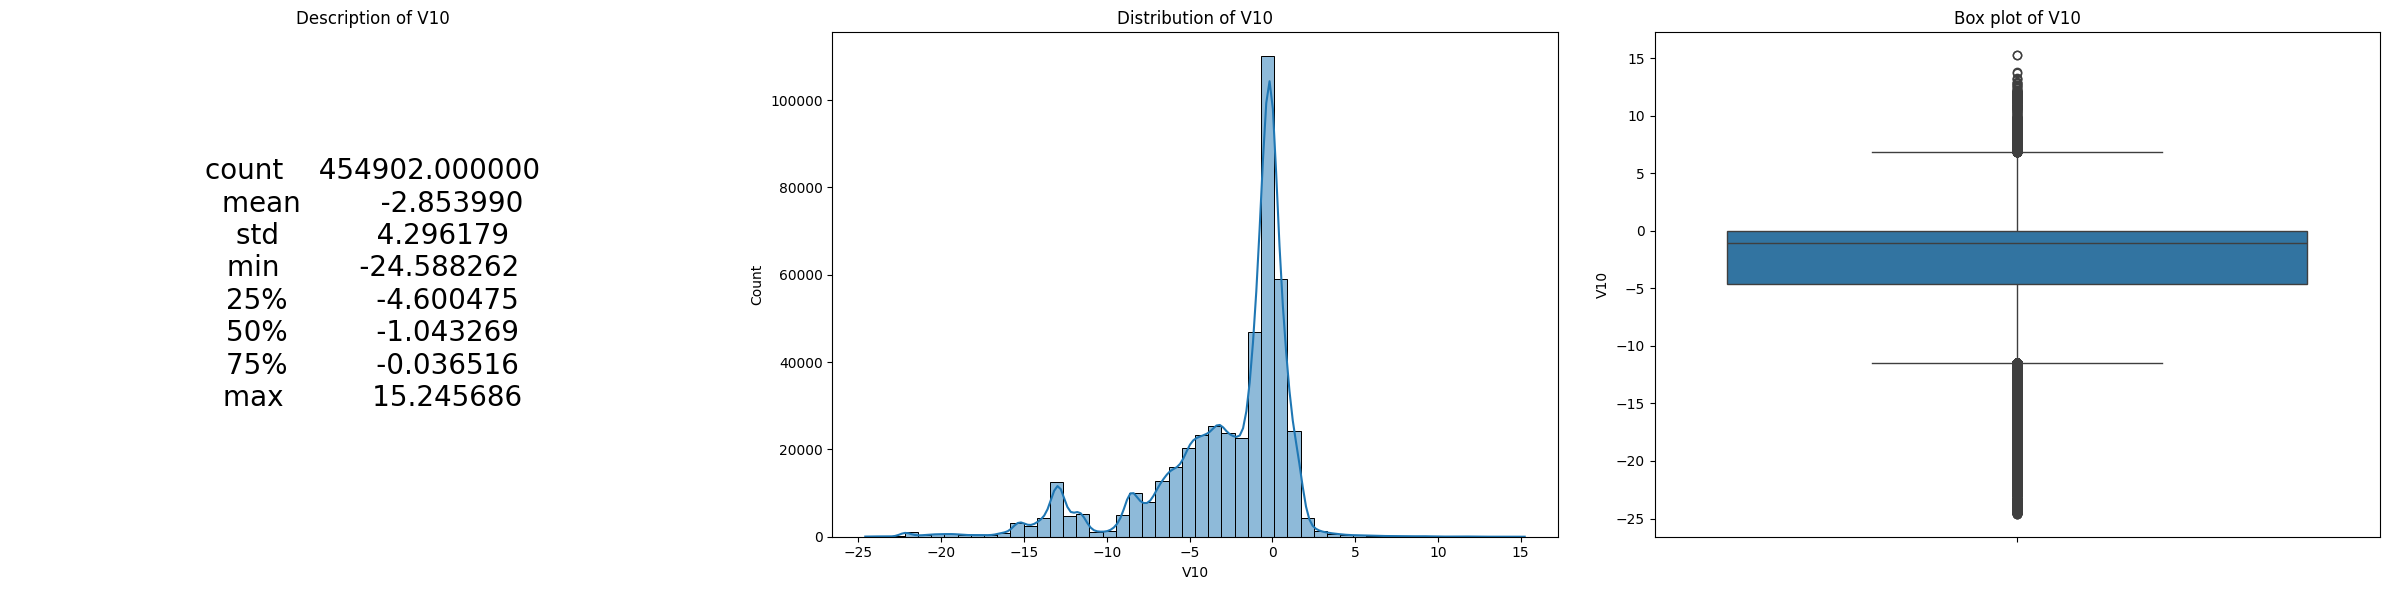

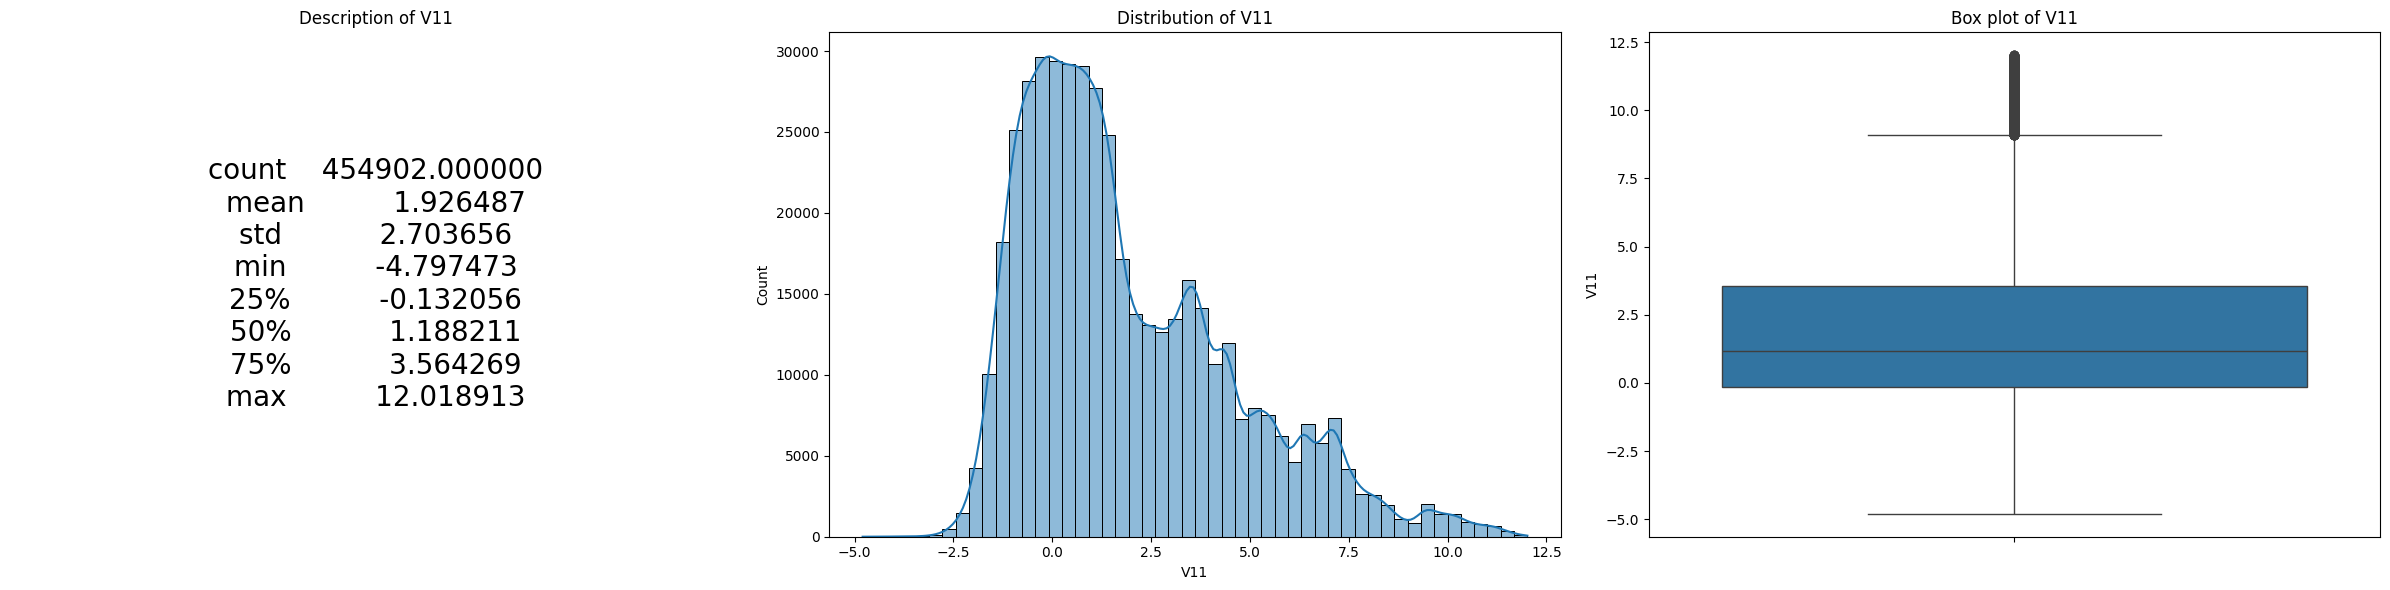

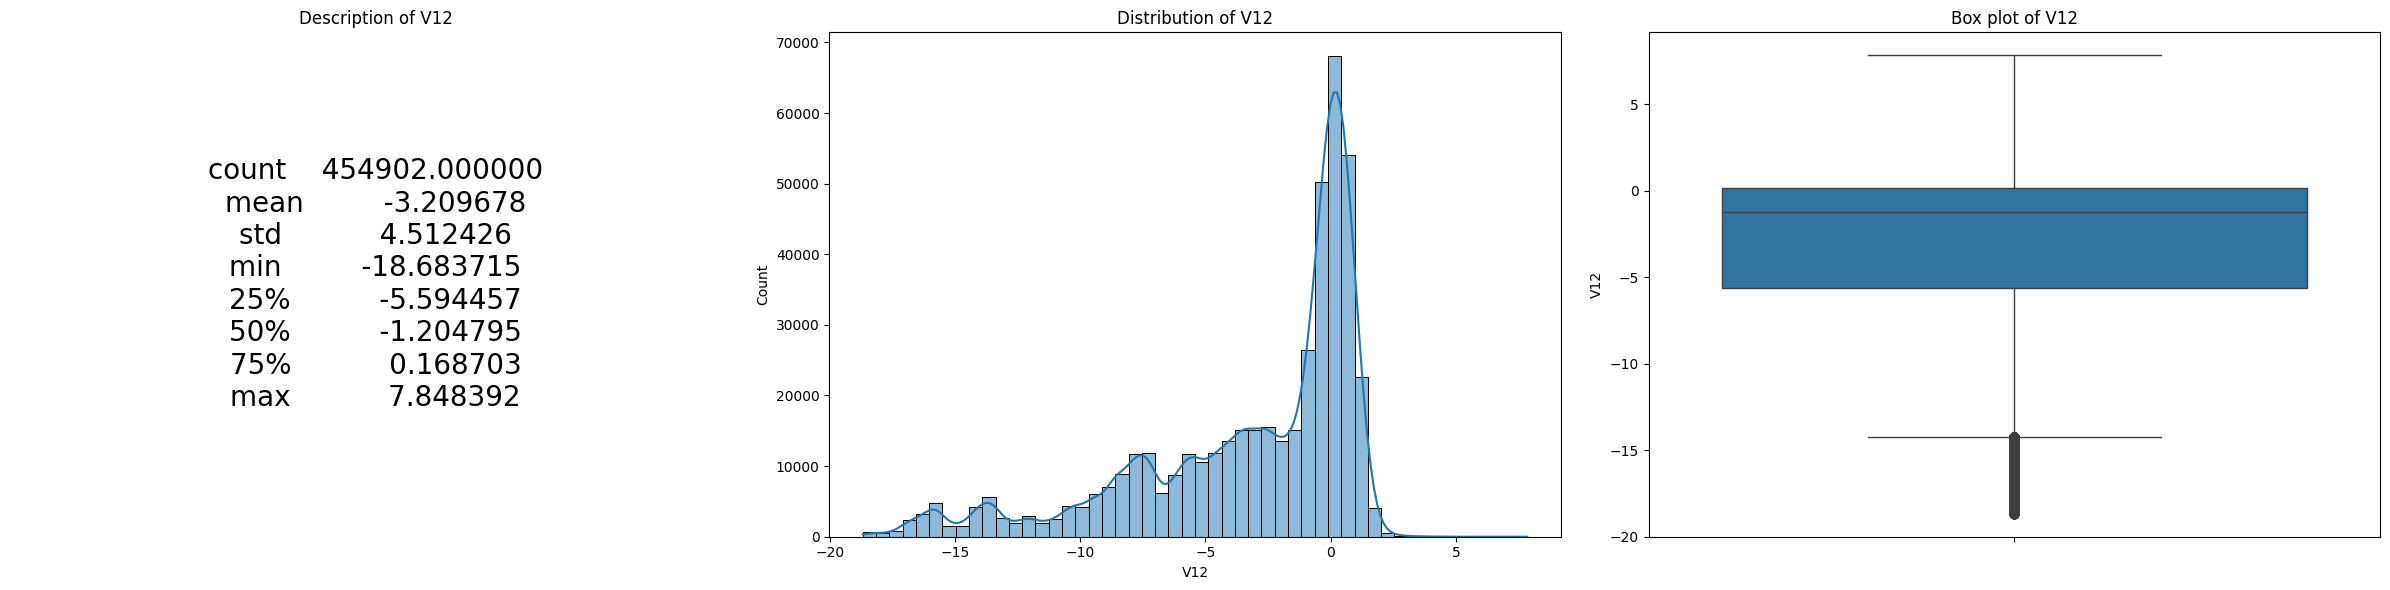

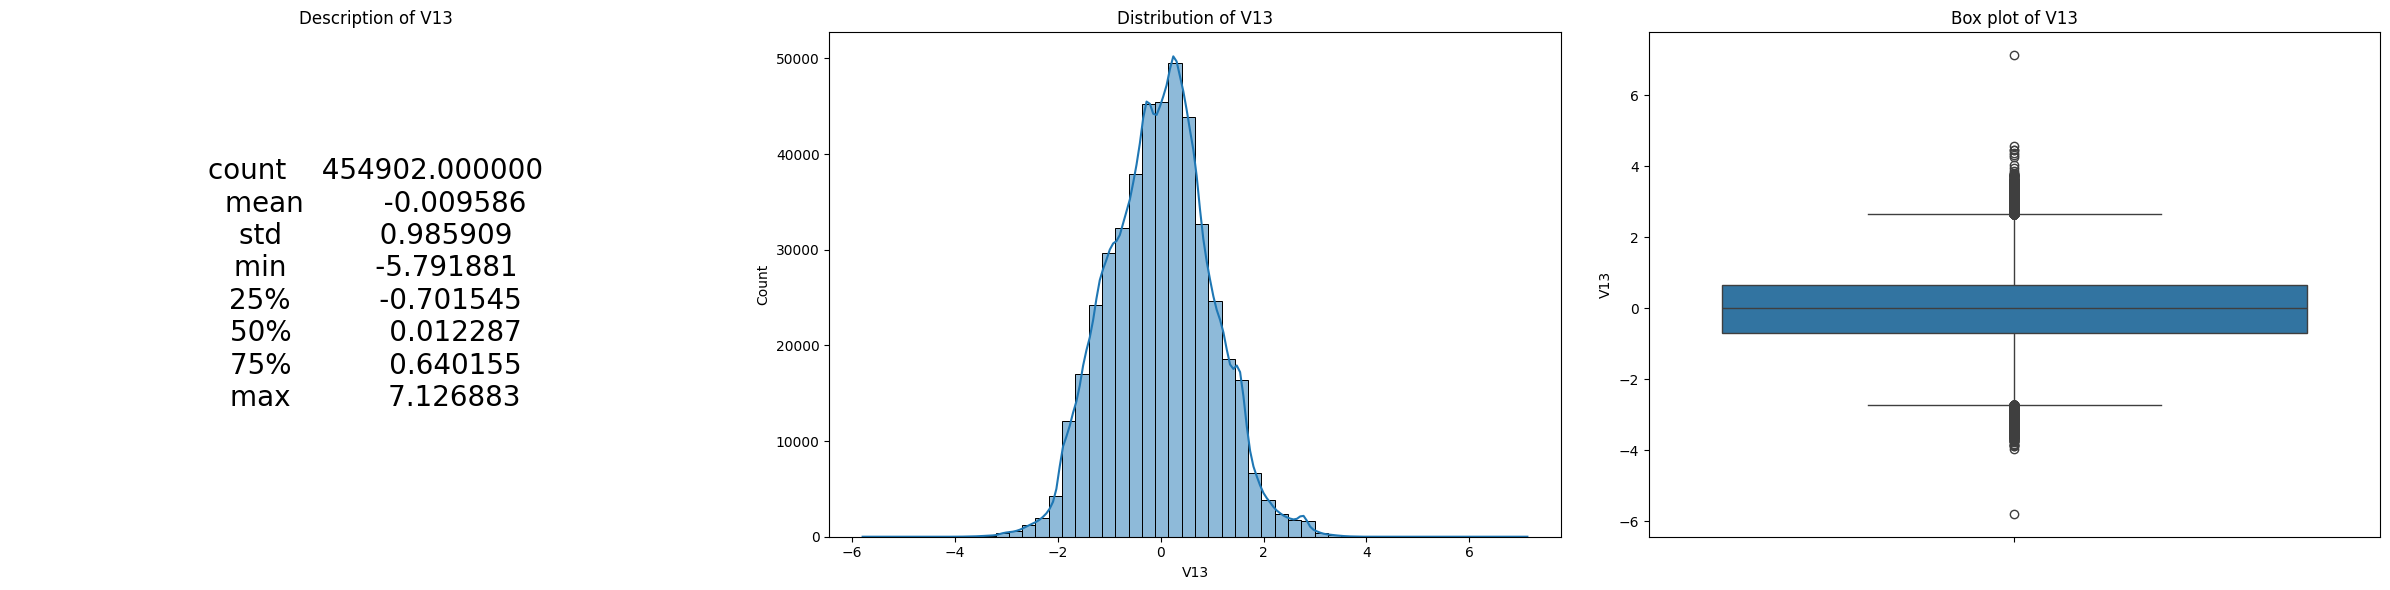

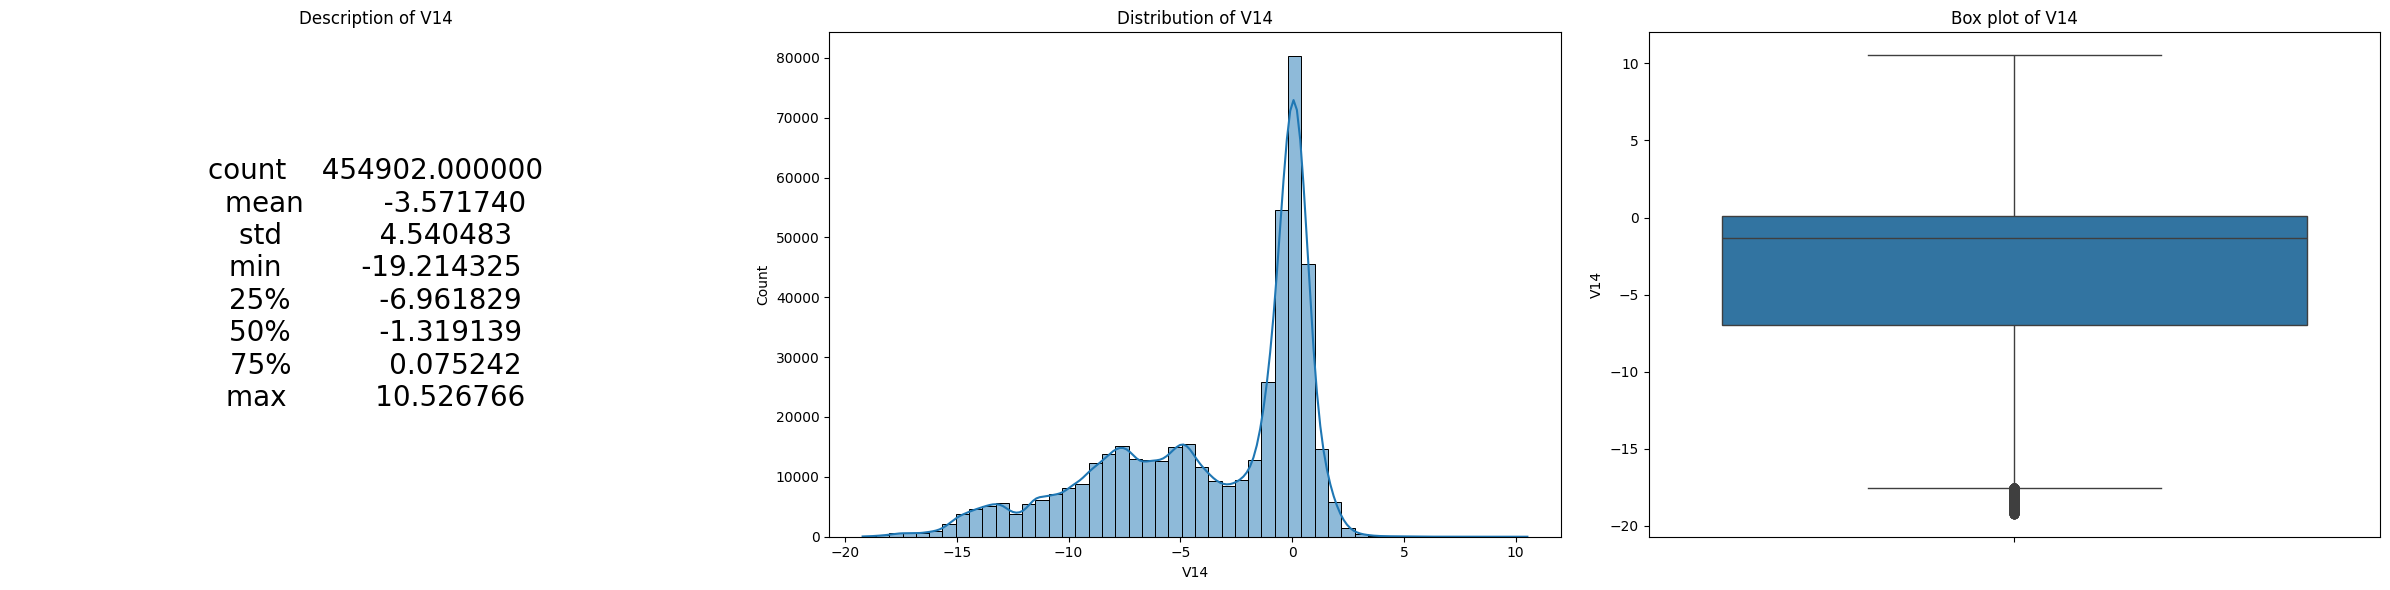

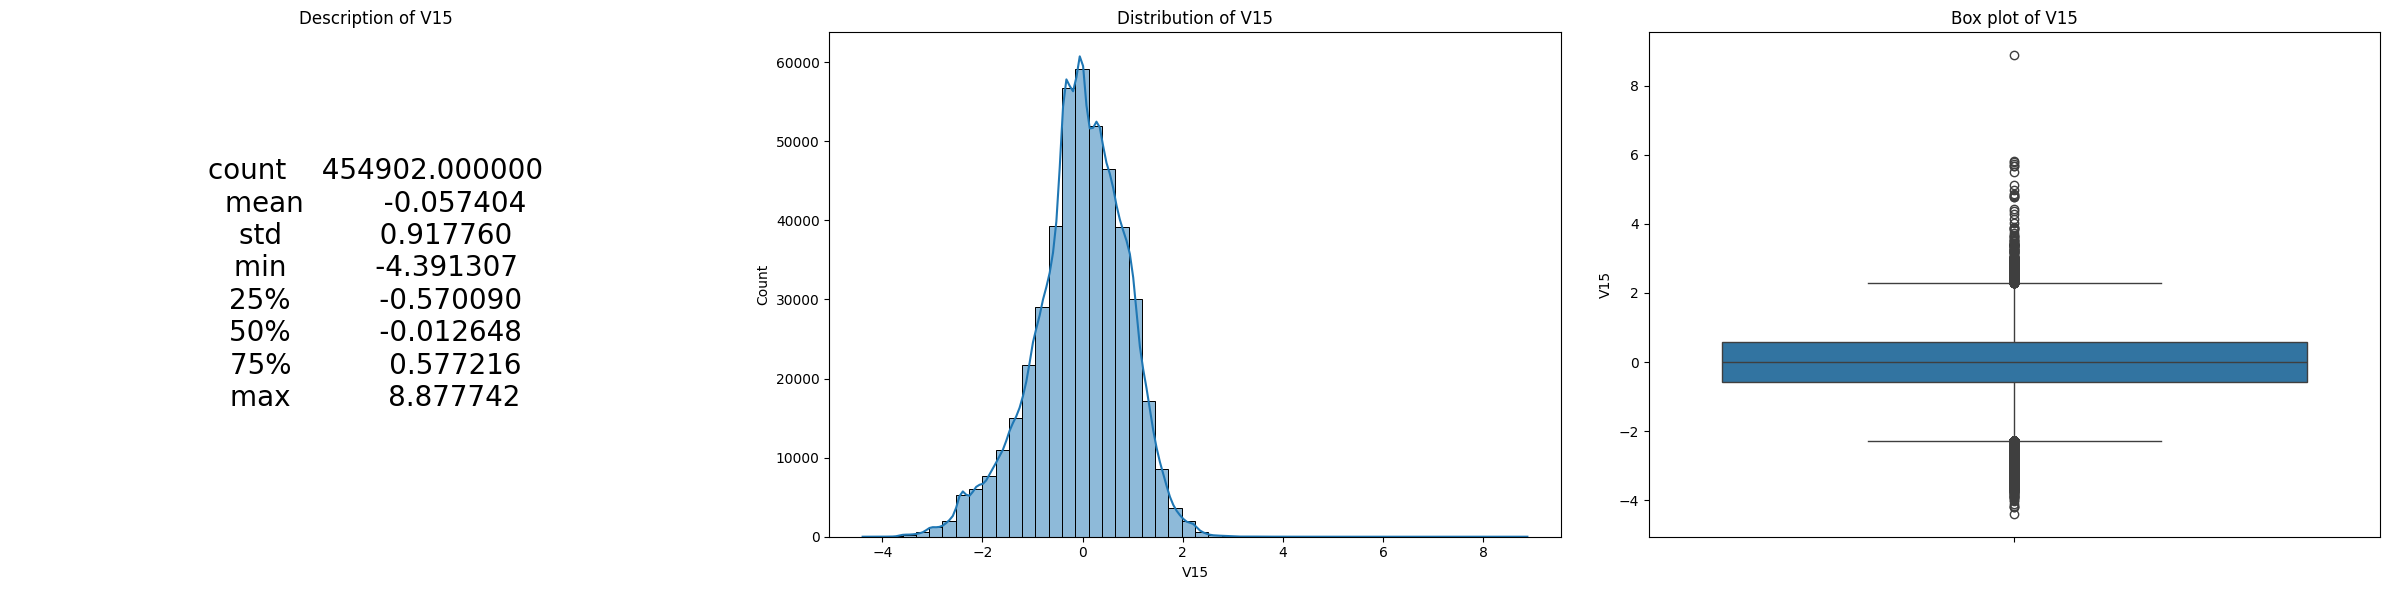

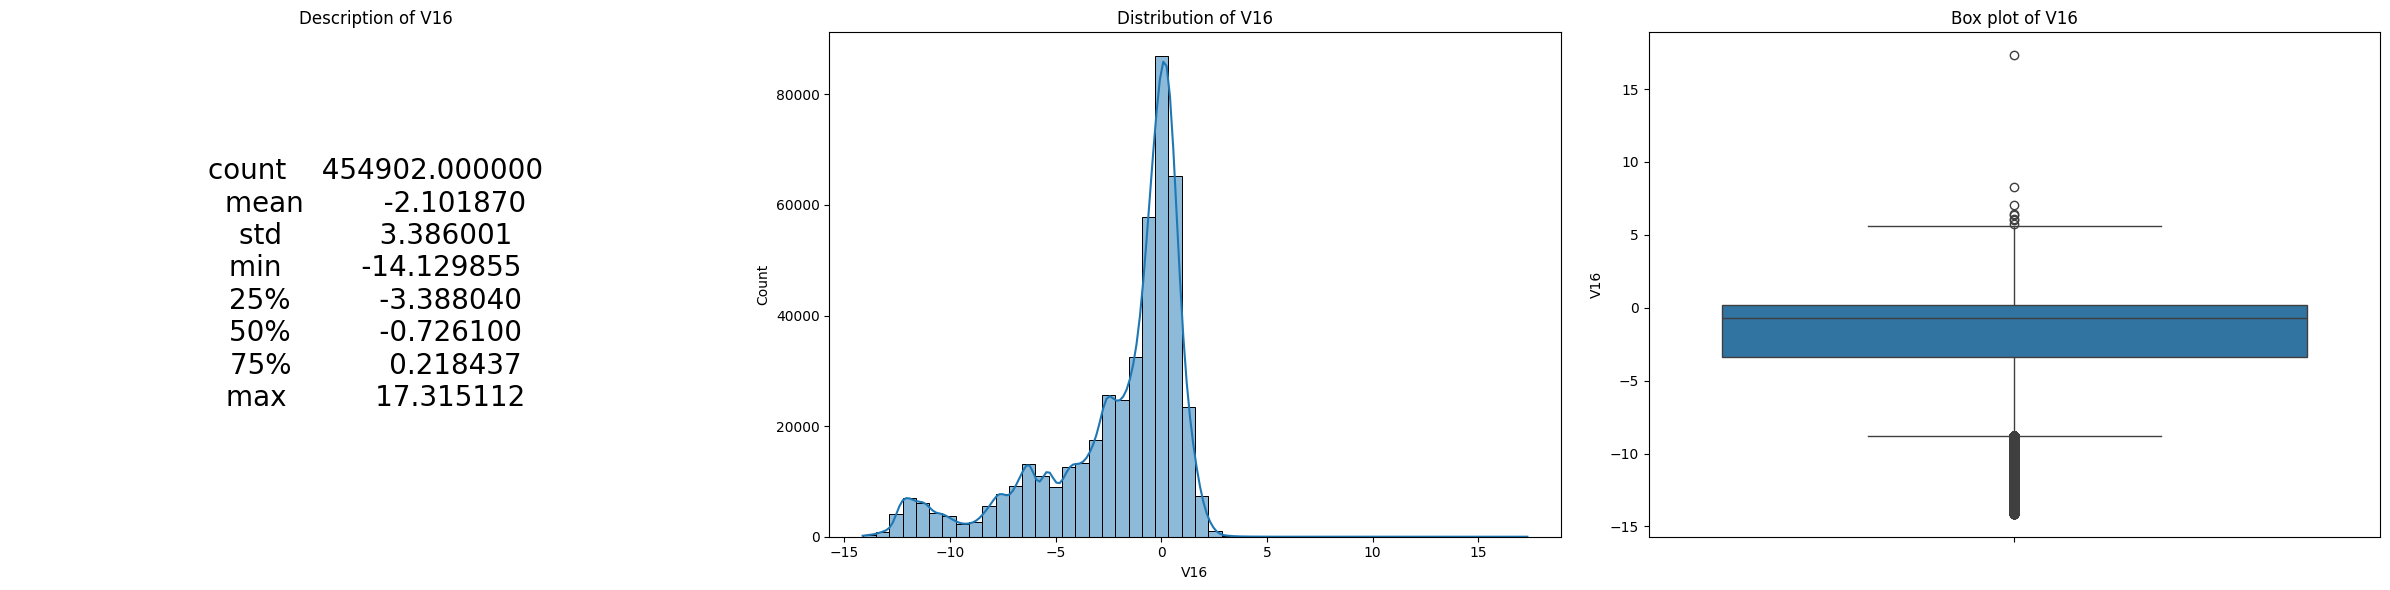

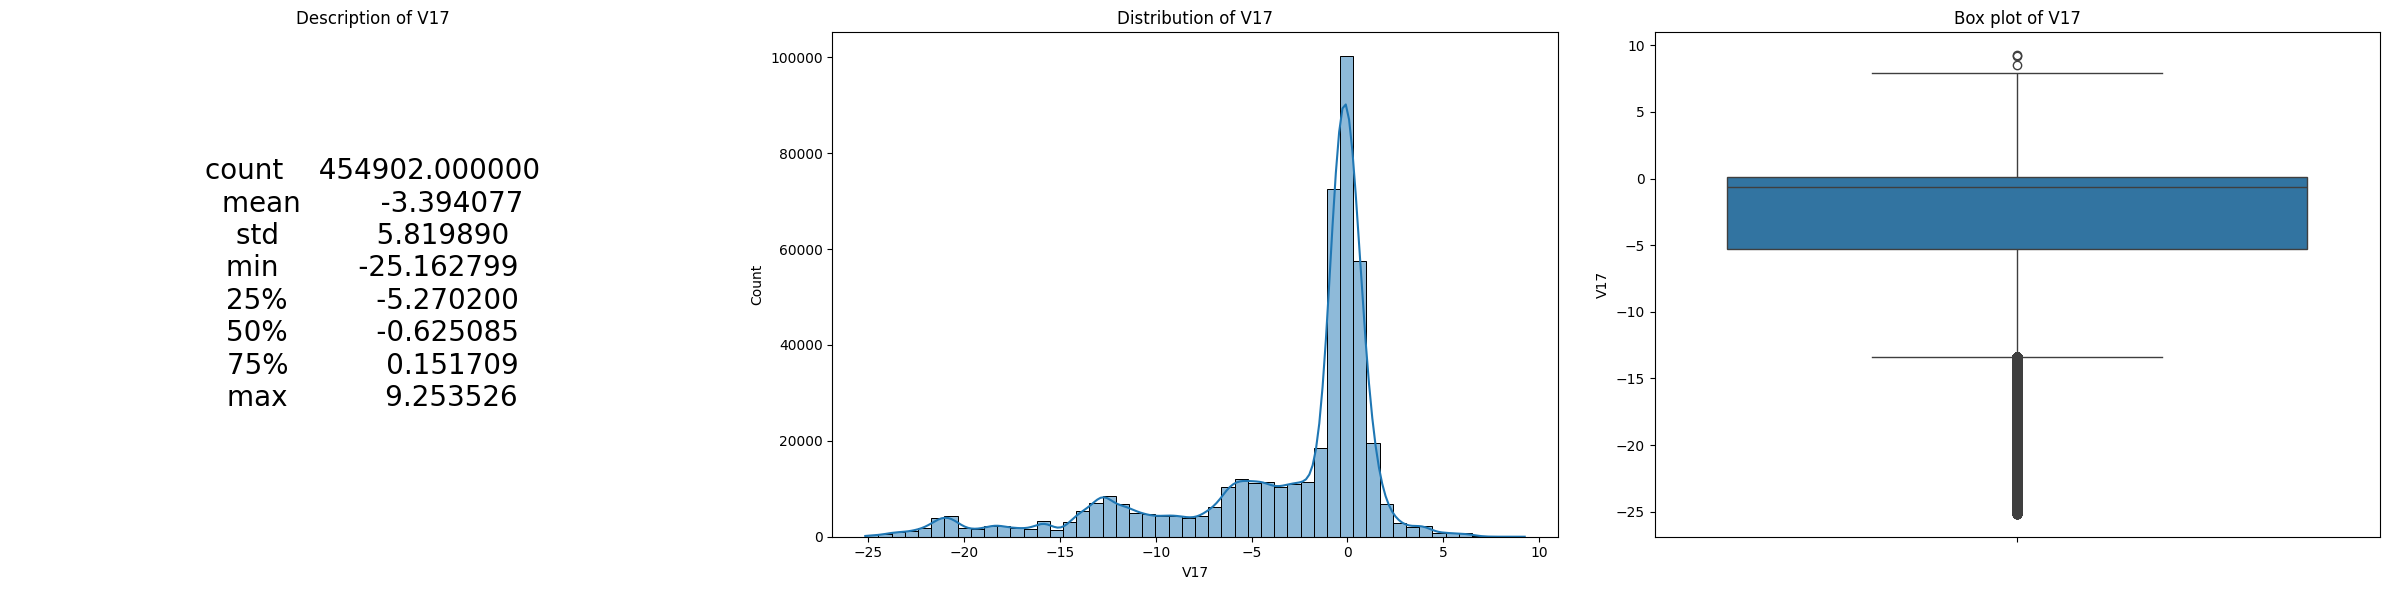

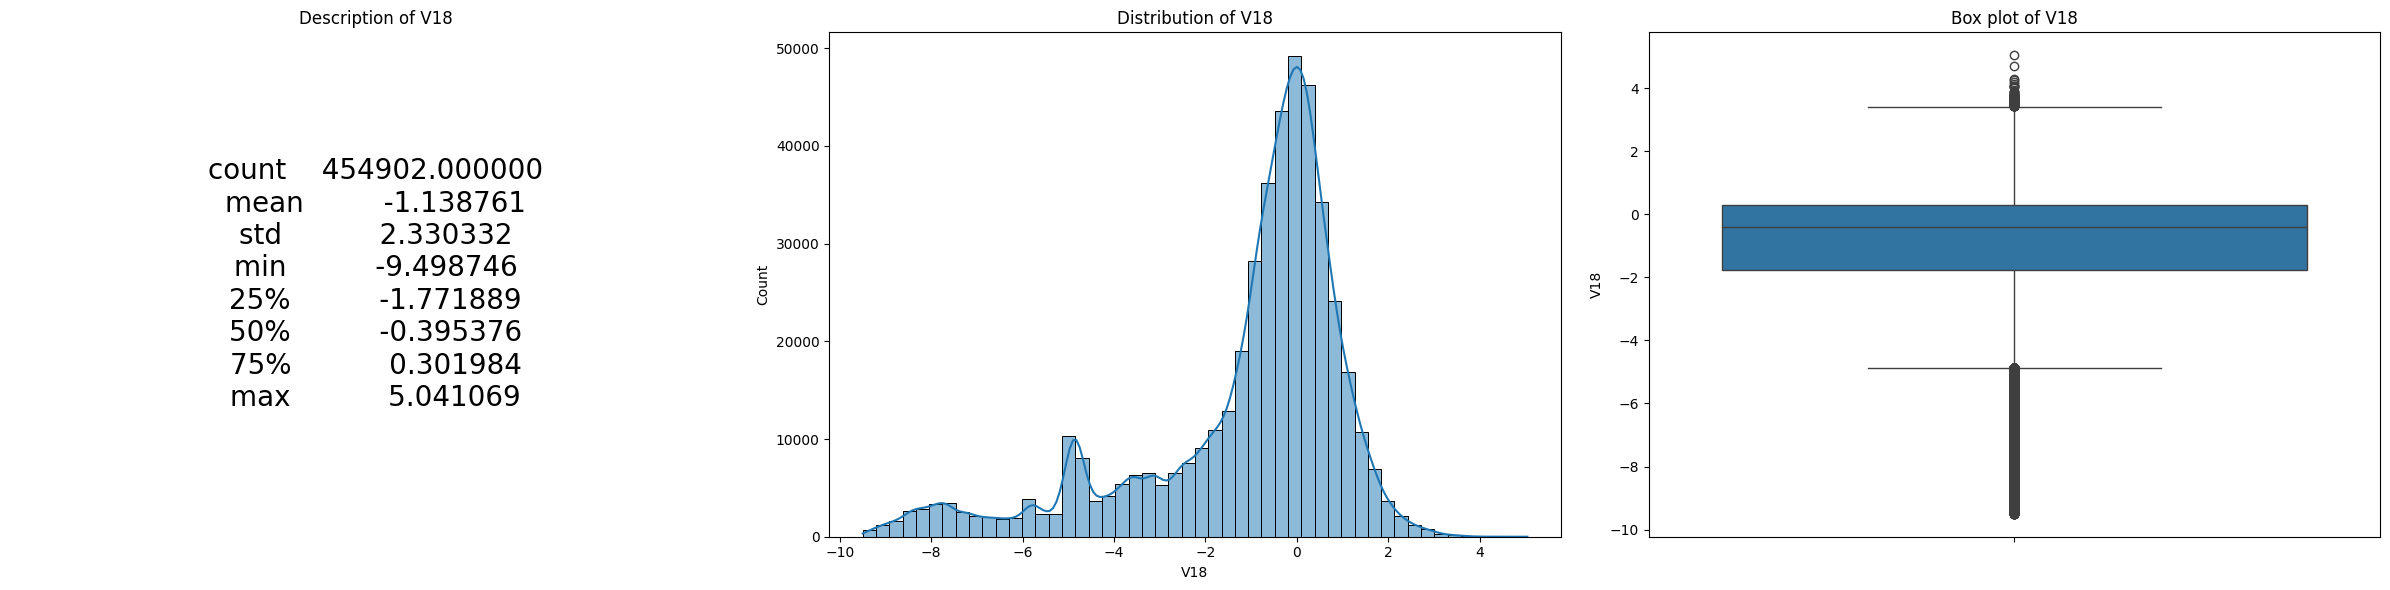

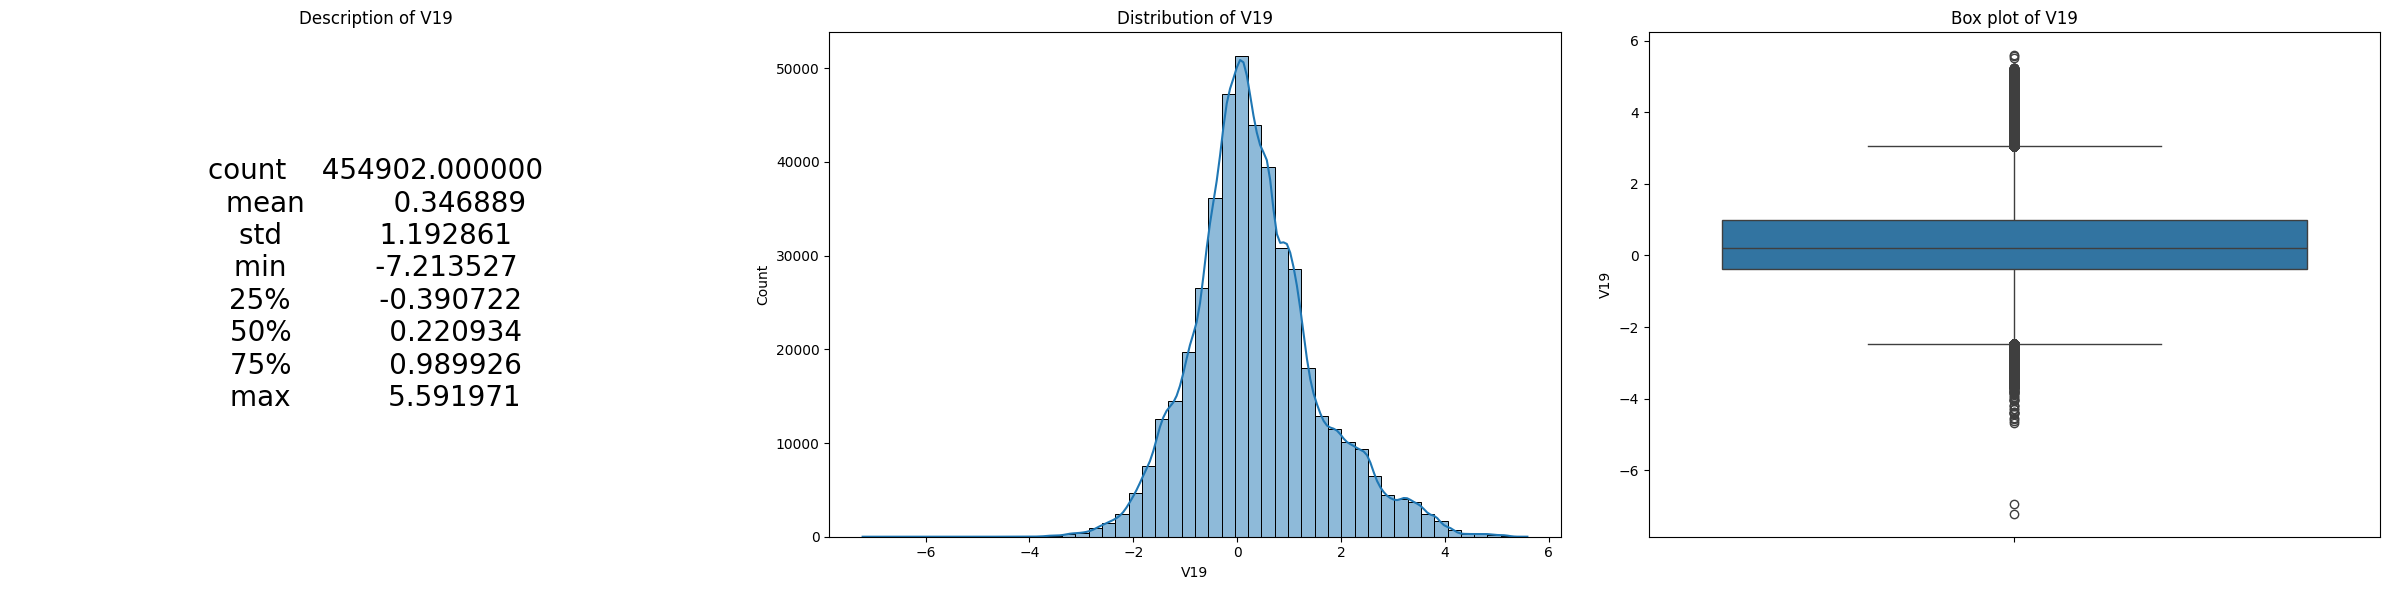

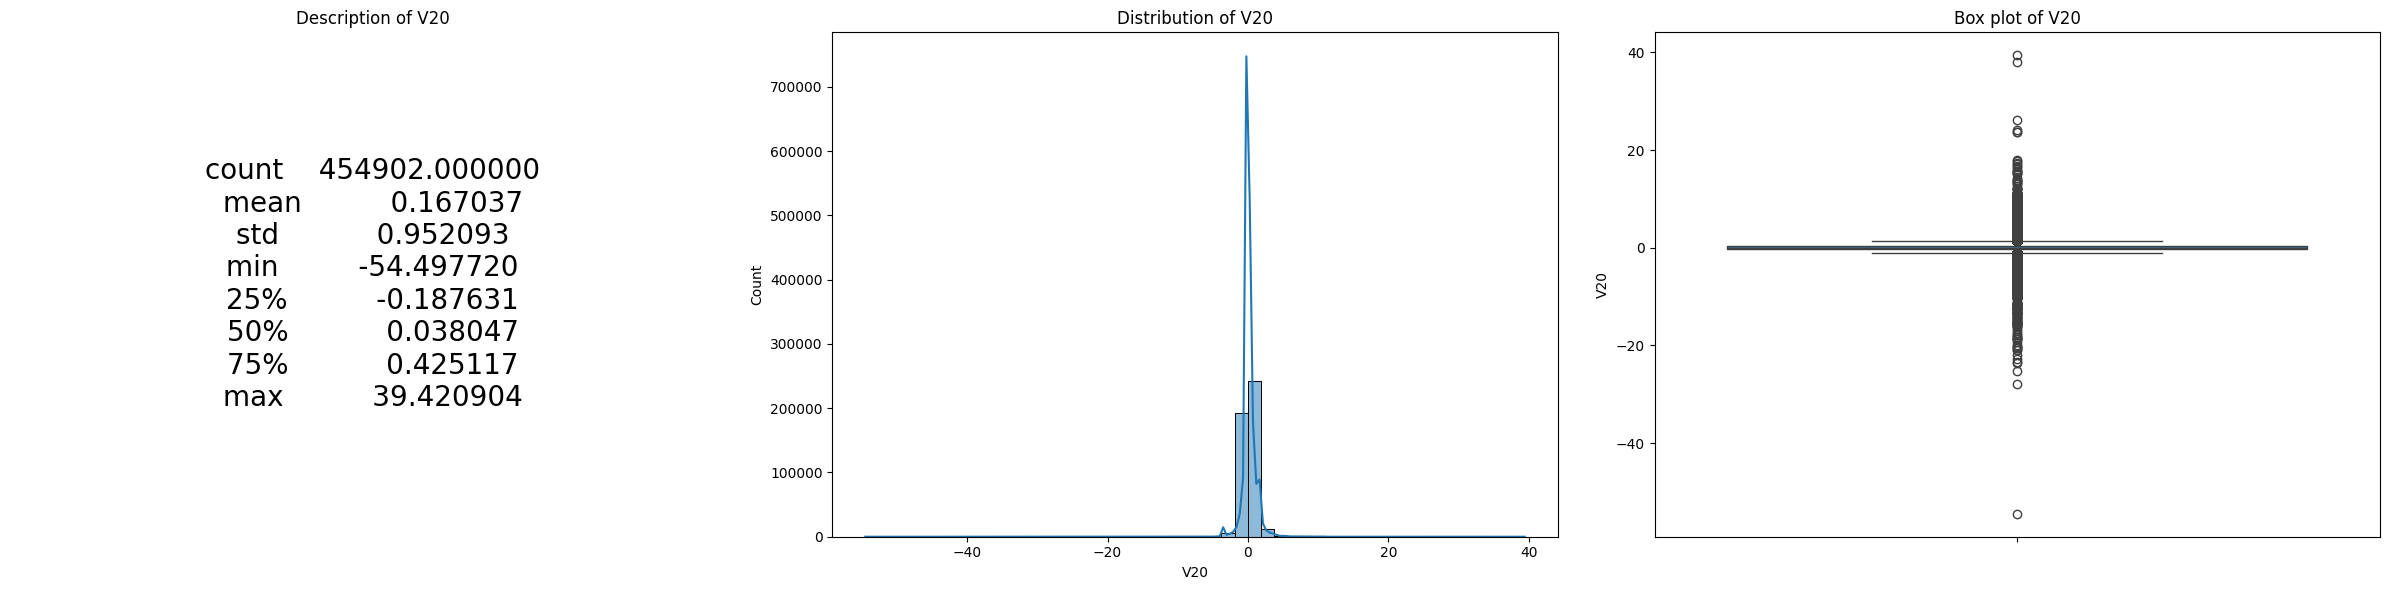

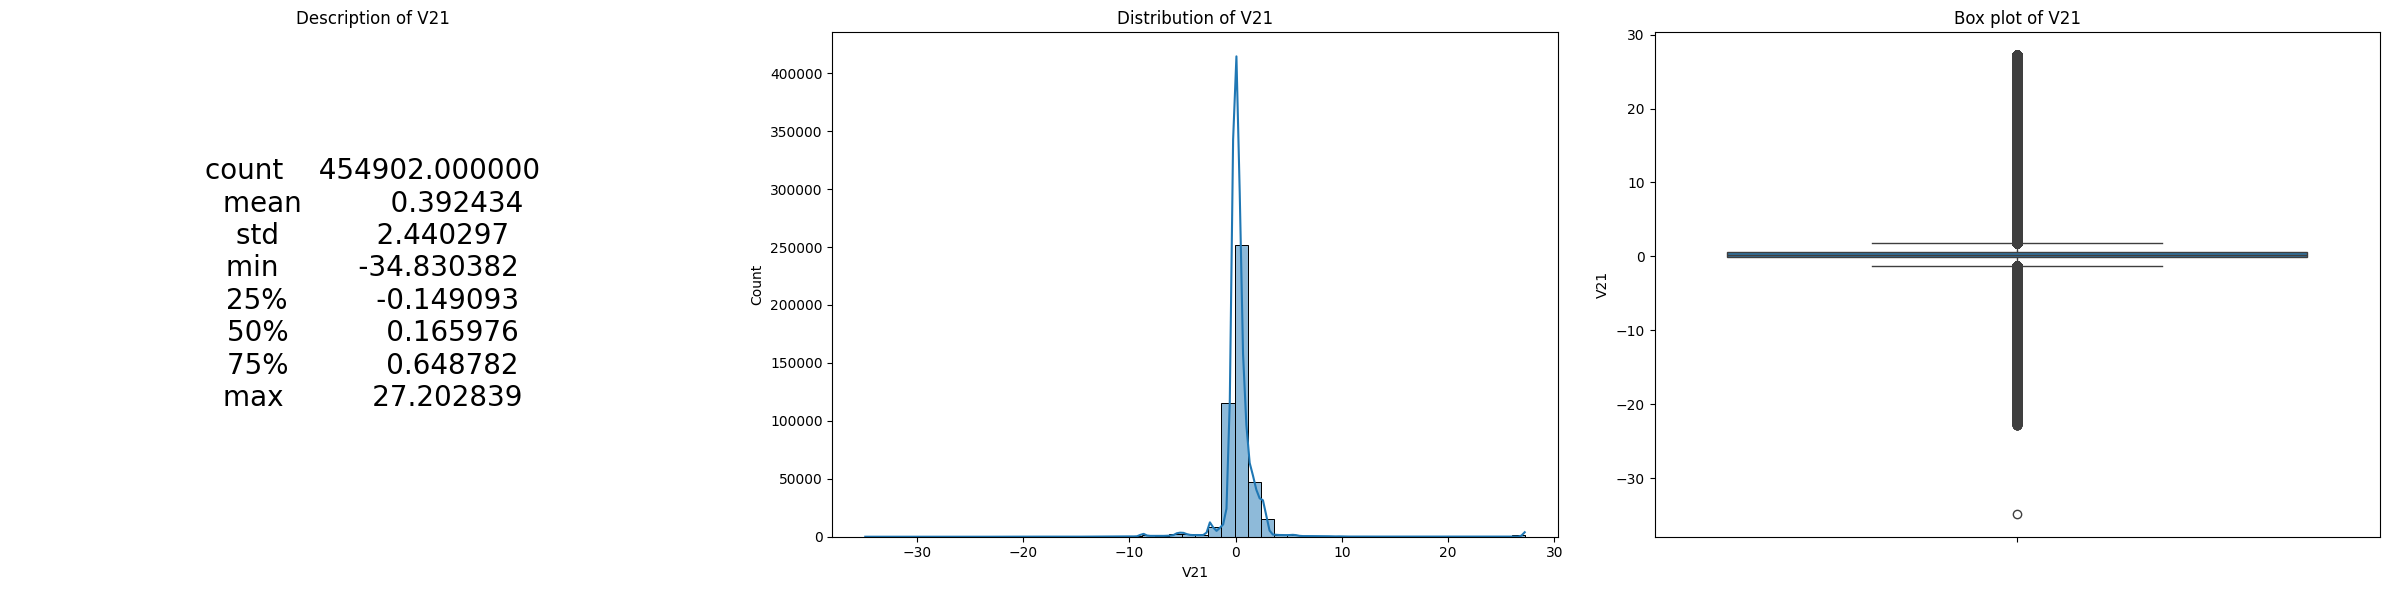

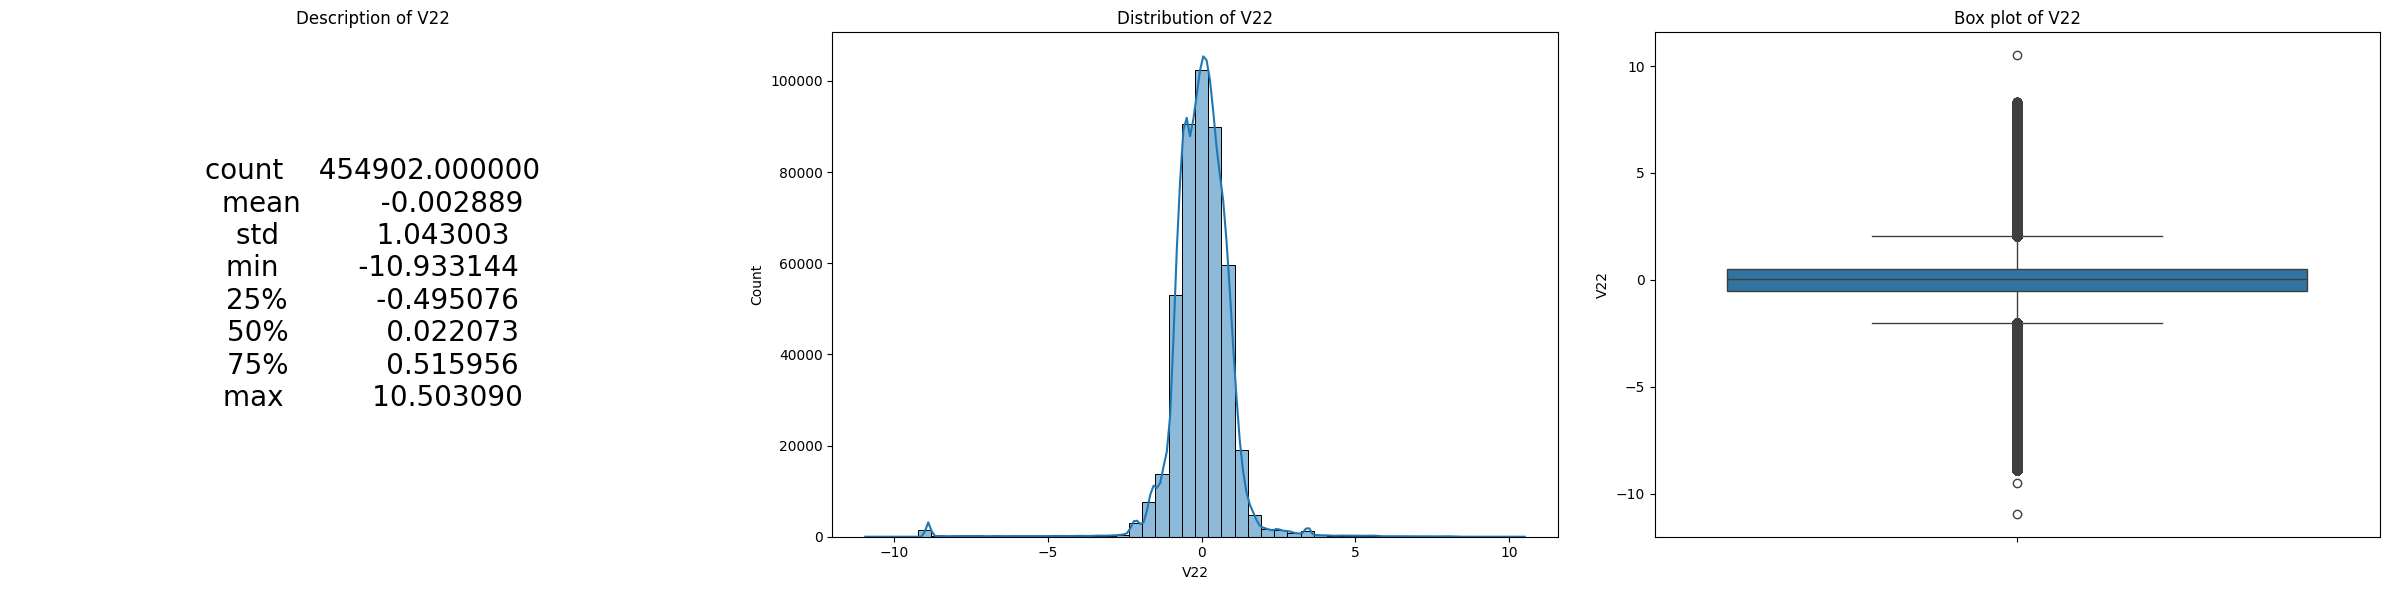

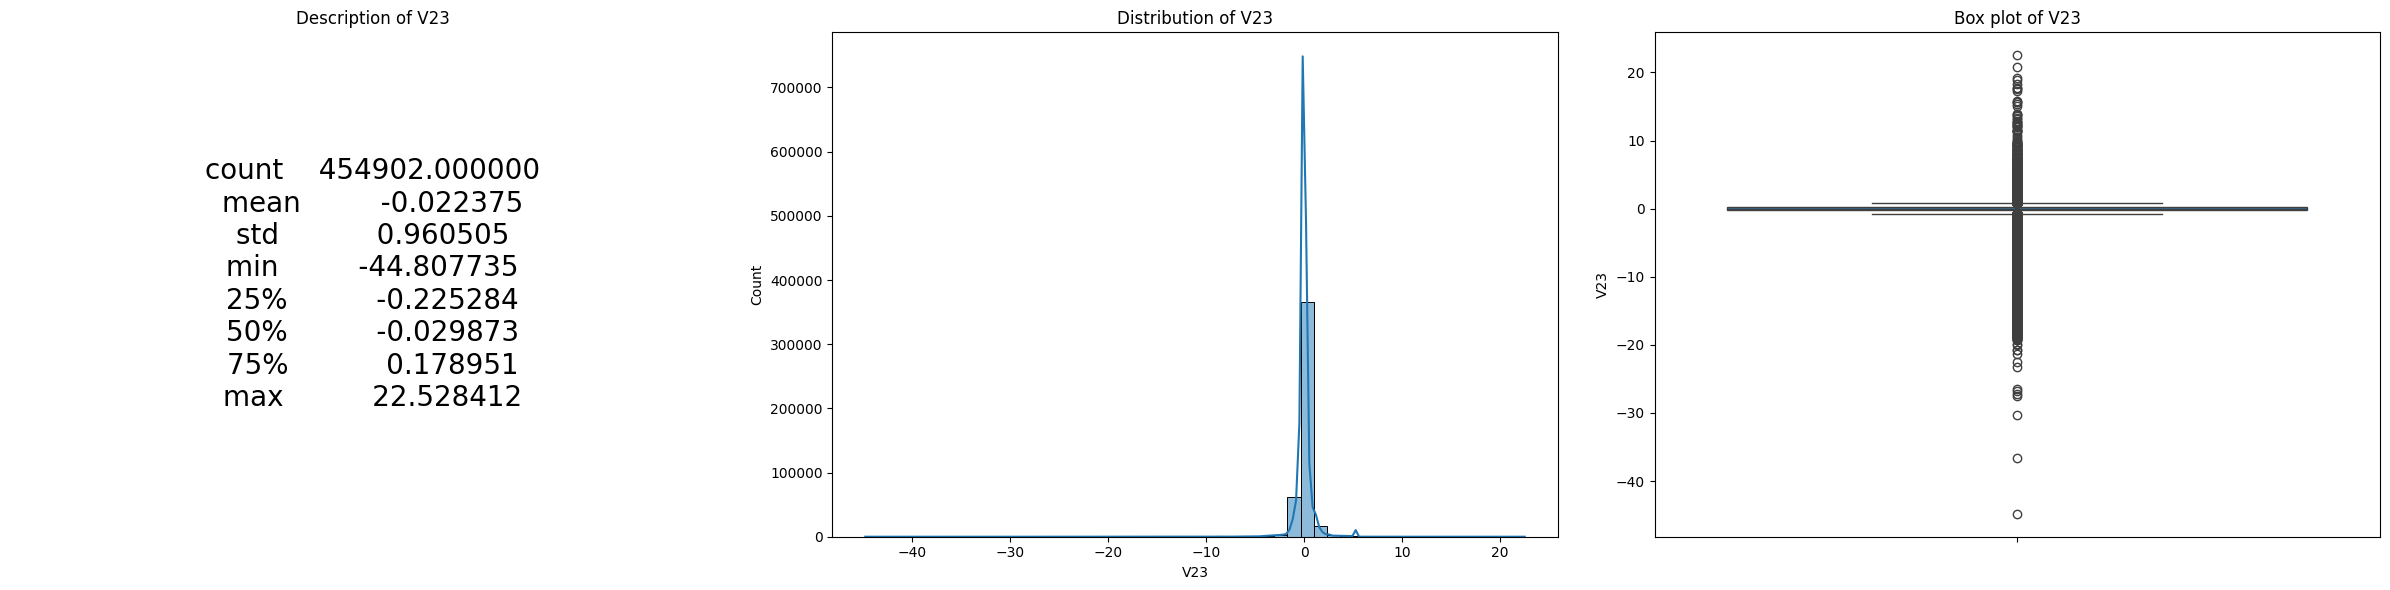

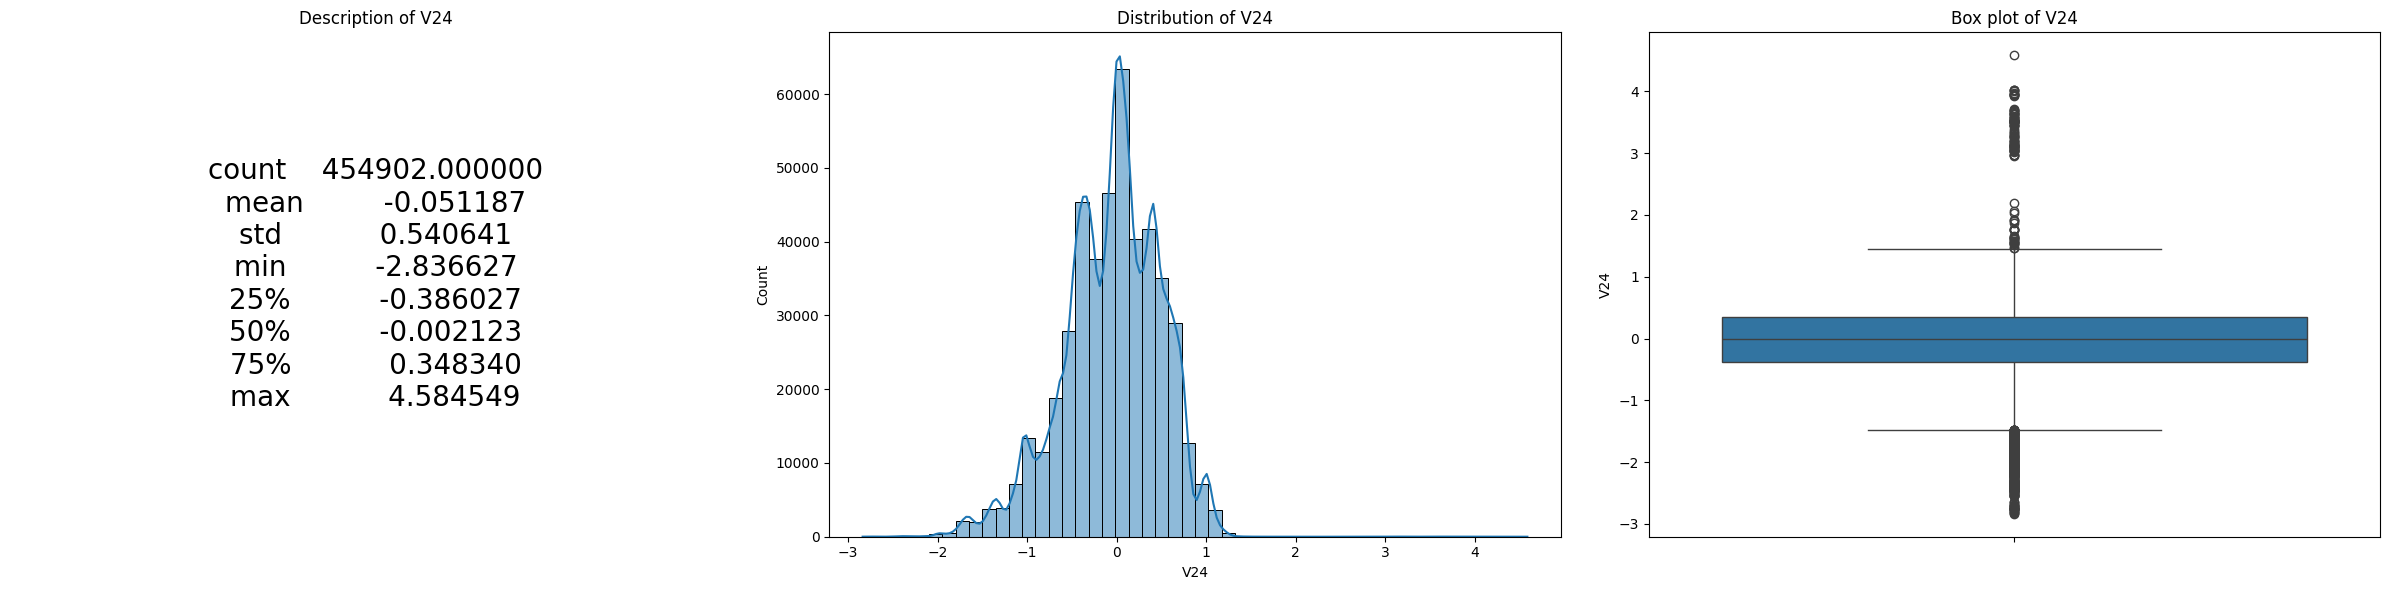

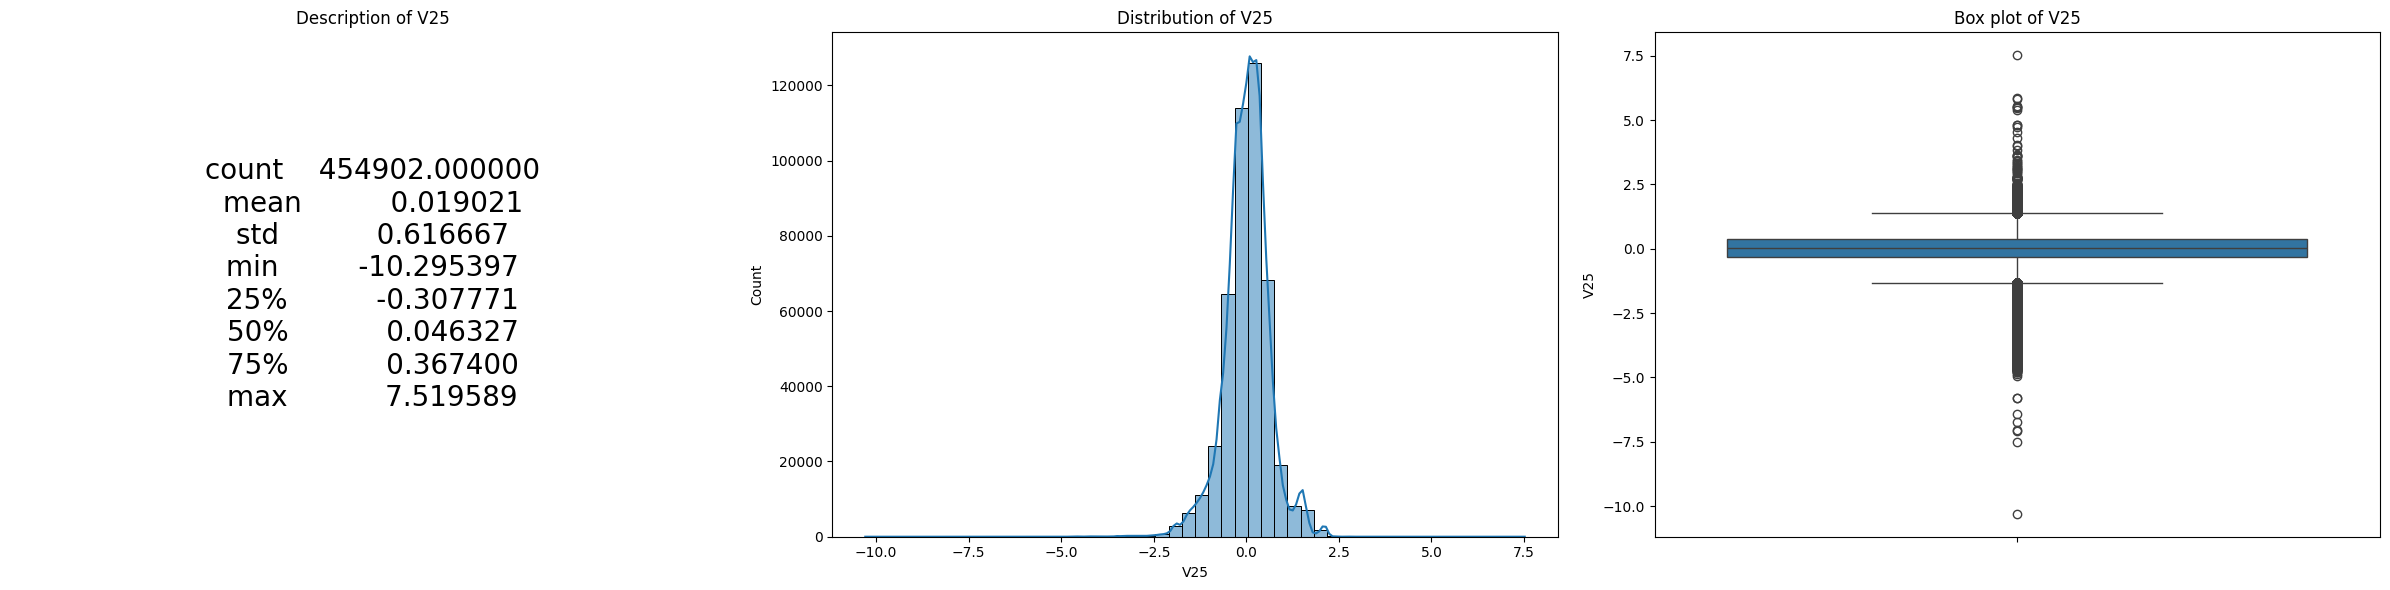

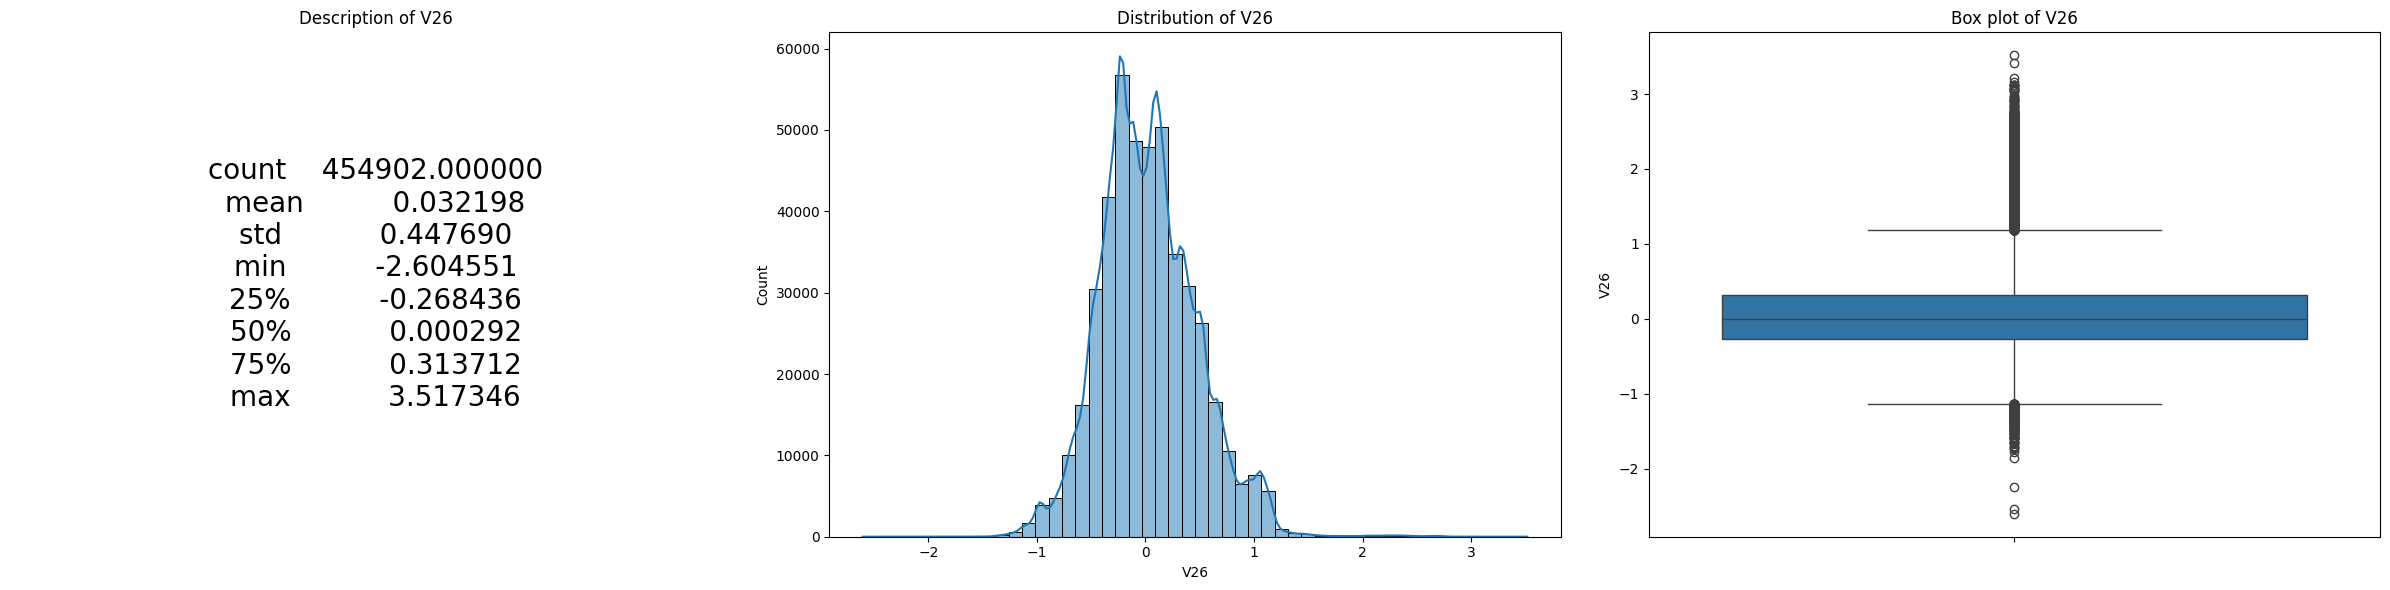

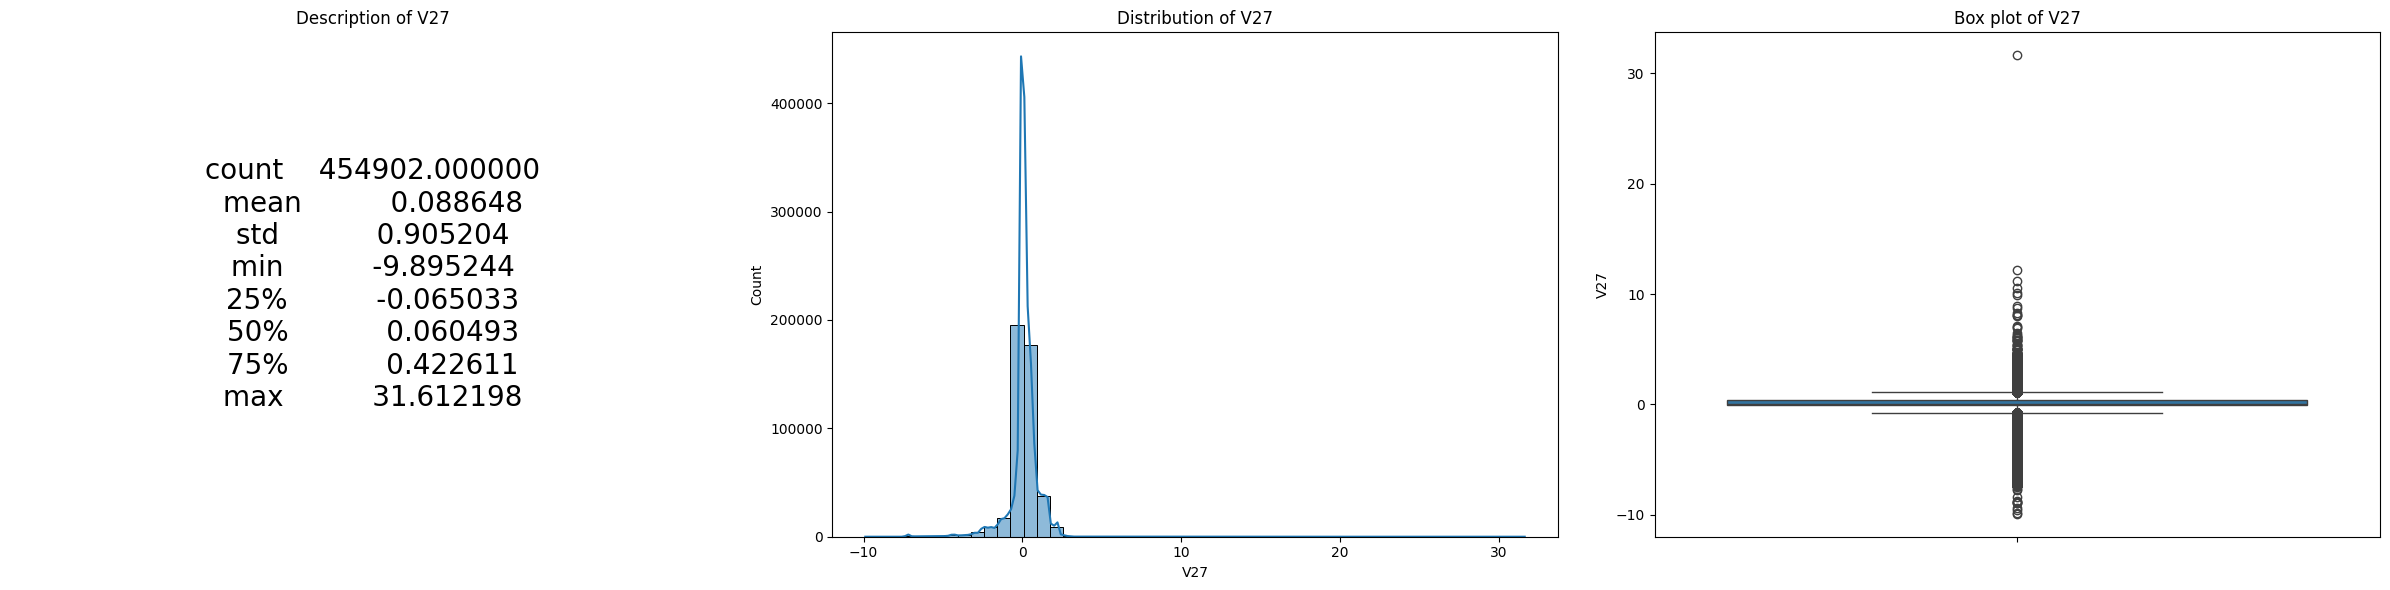

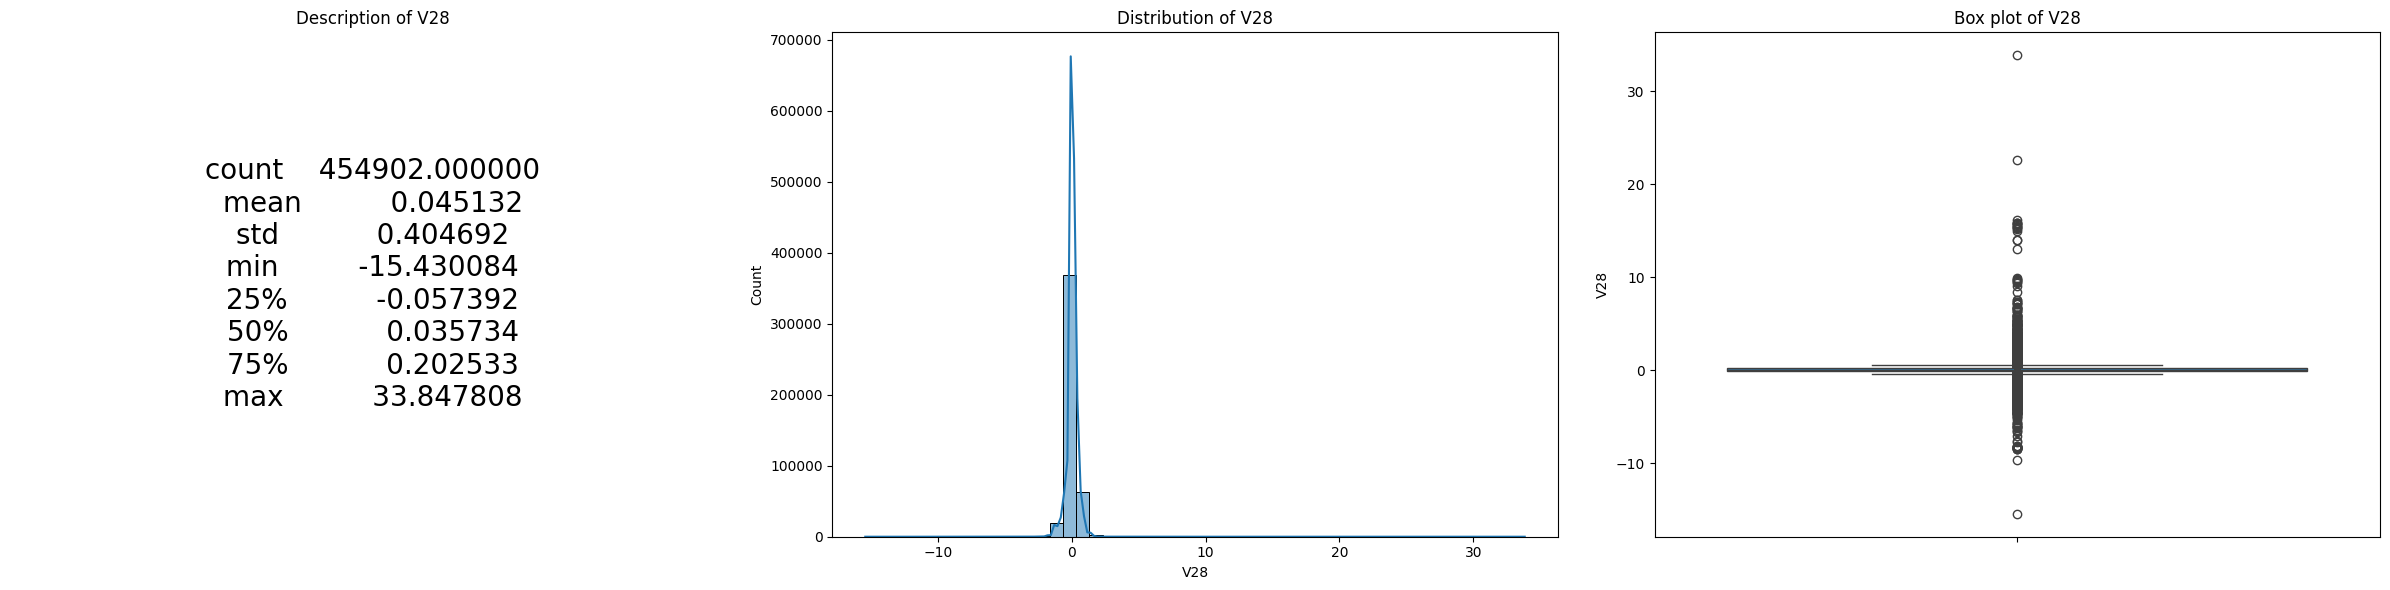

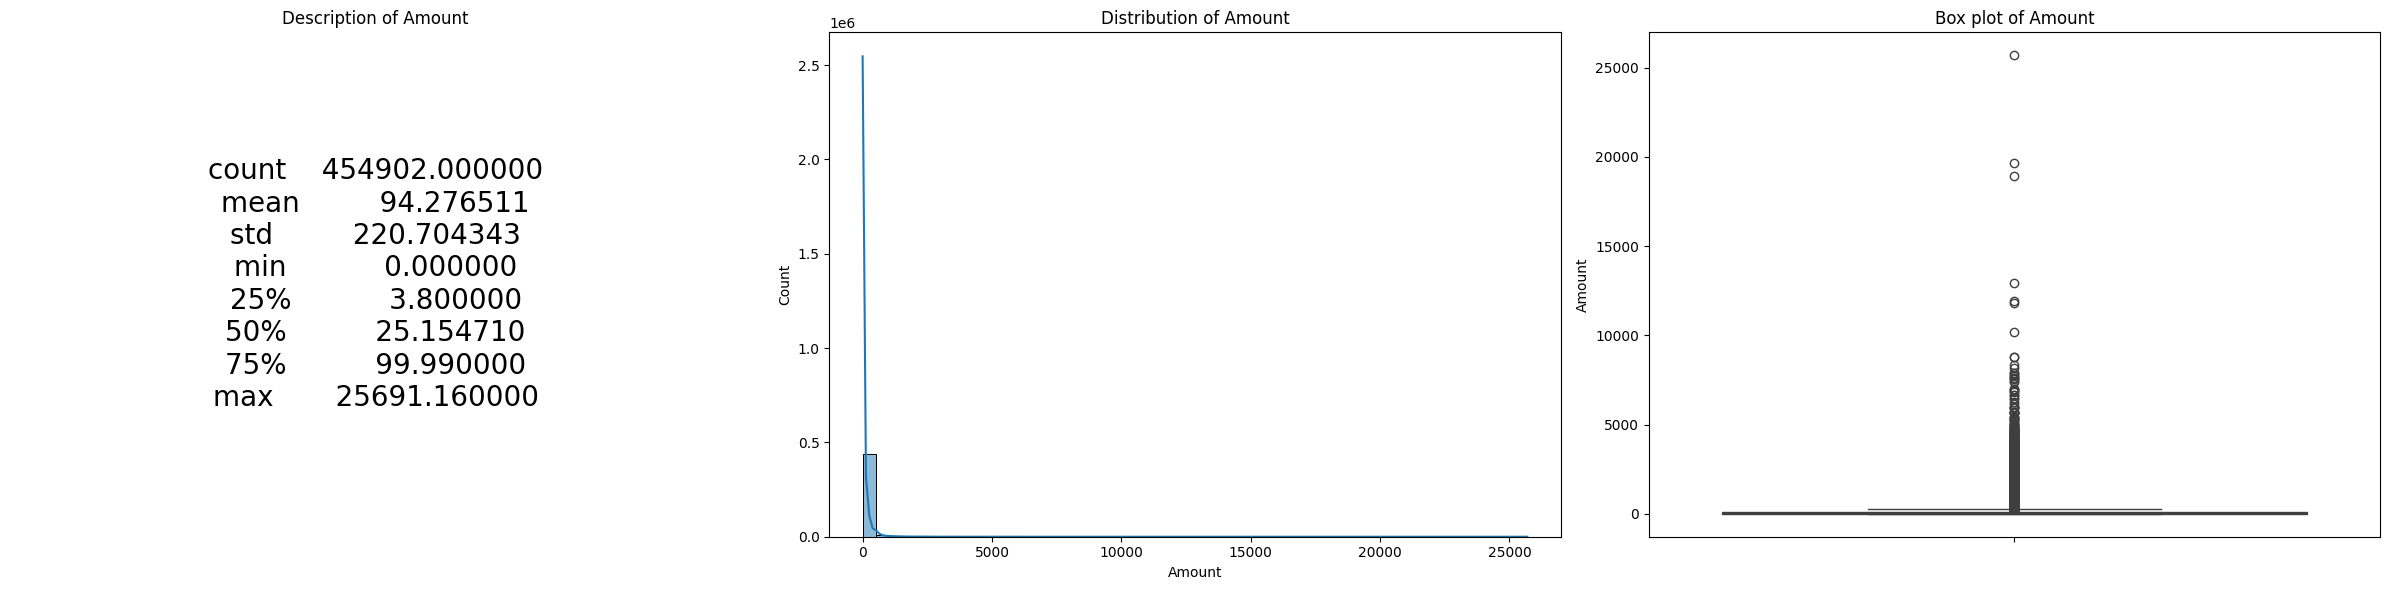

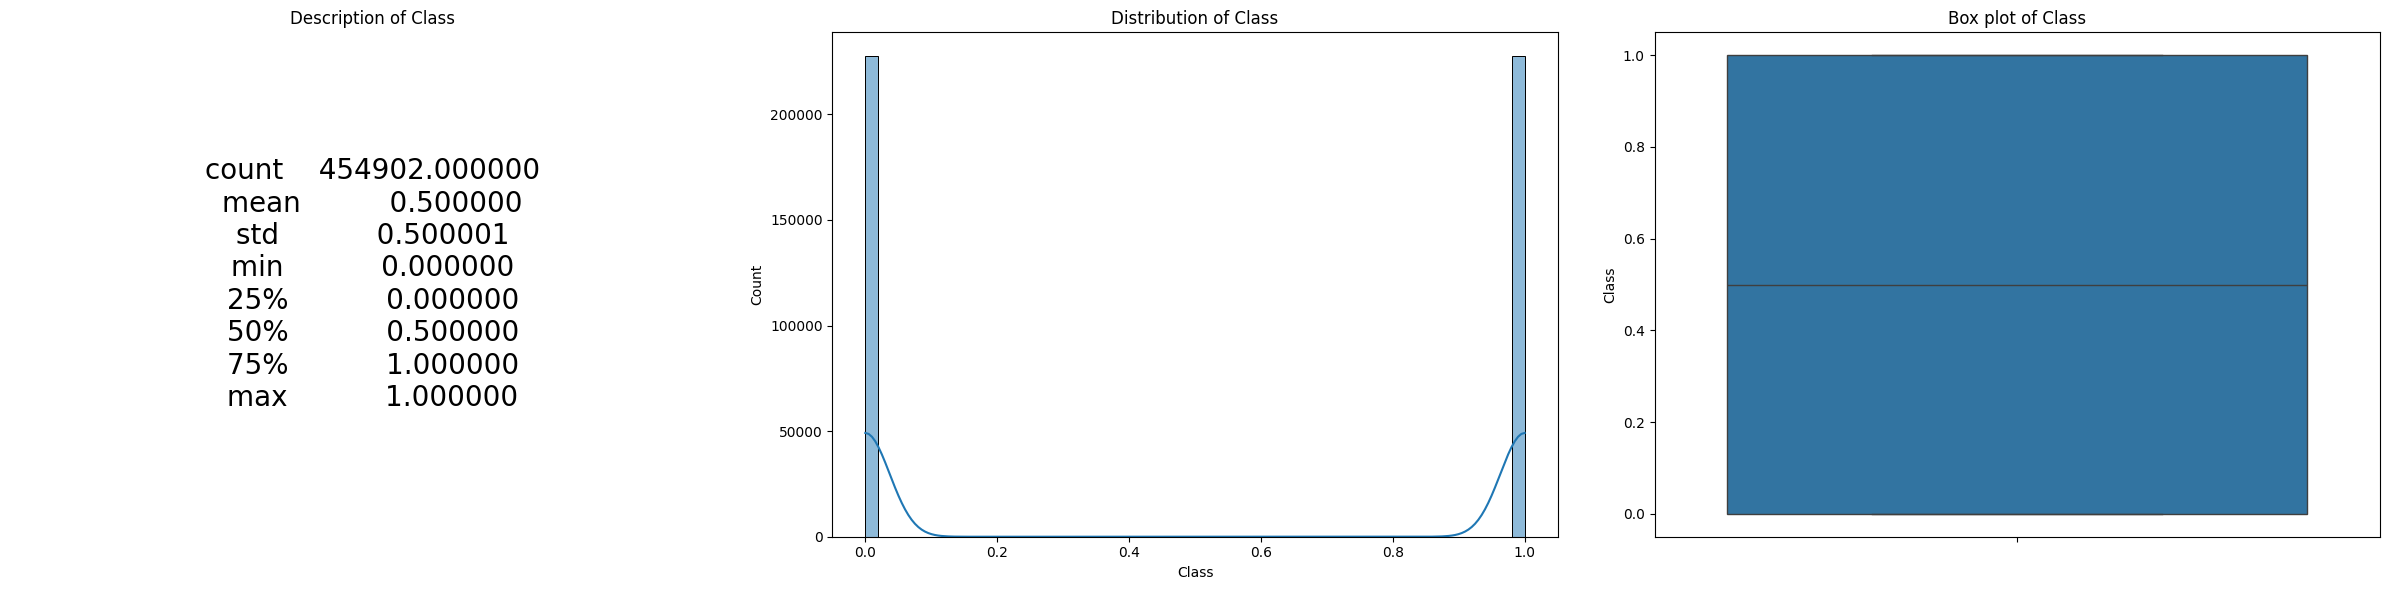

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'balanced_df' is your dataframe and 'columns_list' is a list of columns you want to iterate through
columns_list = balanced_df.columns

for column in columns_list:
    # Create a figure with 3 subplots in one row
    fig, axes = plt.subplots(1, 3, figsize=(24, 6))  # 1 row, 3 columns
    
    # 1. Show column description as text in the first plot
    description = balanced_df[column].describe().to_string()
    axes[0].text(0.5, 0.5, description, horizontalalignment='center', verticalalignment='center', fontsize=20, wrap=True)
    axes[0].axis('off')  # Turn off axis for the description text
    axes[0].set_title(f'Description of {column}')
    
    # 2. Create Histogram on the second axis
    sns.histplot(x=balanced_df[column], bins=50, kde=True, ax=axes[1])
    axes[1].set_title(f'Distribution of {column}')
    
    # 3. Create Boxplot on the third axis
    sns.boxplot(y=balanced_df[column], ax=axes[2])
    axes[2].set_title(f'Box plot of {column}')
    
    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()


### 2.2 Bivariate analysis

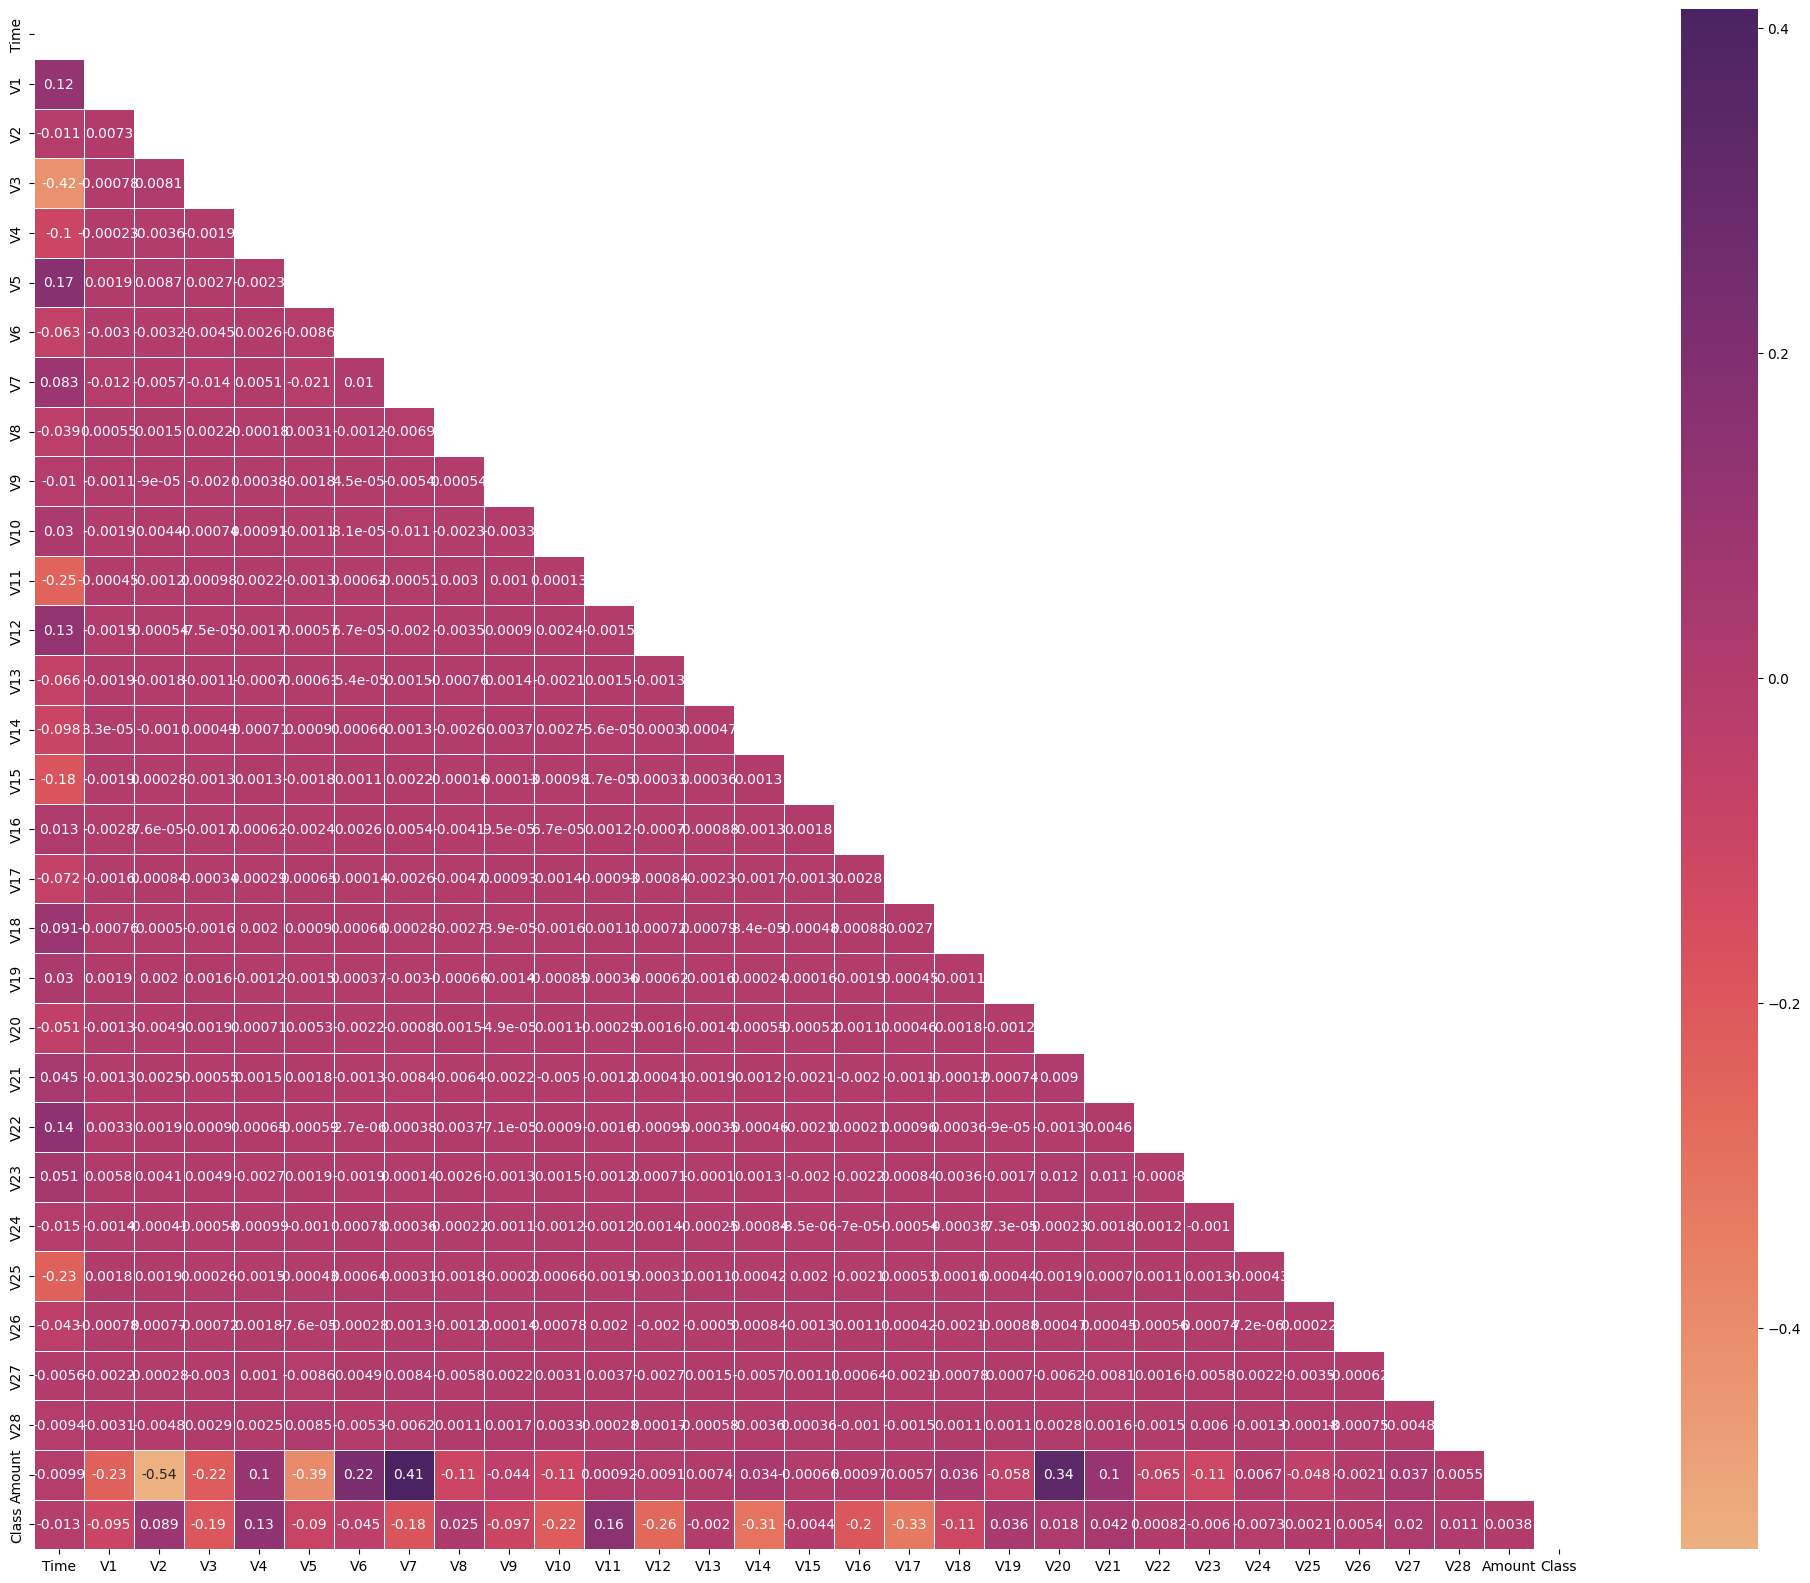

In [11]:
coor_df = cc_train.corr()

mask = np.zeros_like(coor_df, dtype='bool')
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(25,20))
# seaborn heatmap
sns.heatmap(coor_df, annot=True, cmap='flare',mask=mask, linewidths=.5)
# plot the heatmap
plt.show()

- Negative Correlations: V7 with Amount || V20 with Amount

- Positive Correlations: V2 & V5 with Amount || V3 with Time

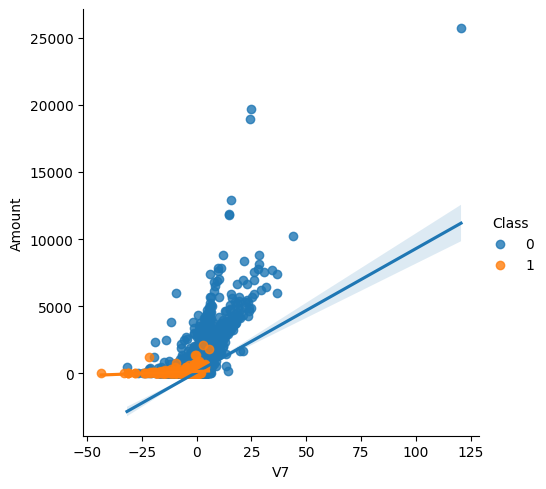

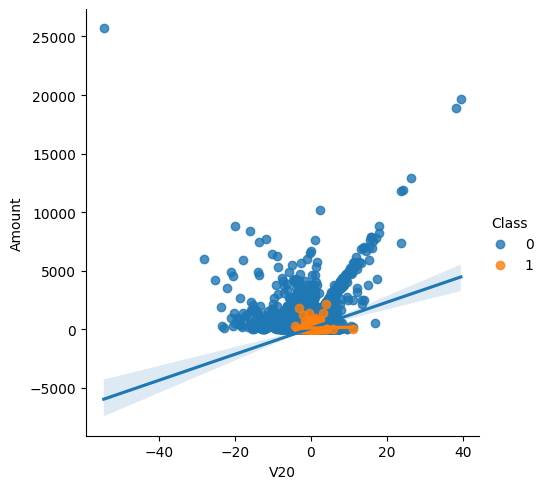

In [12]:
# Create individual lmplots for negative correlation

sns.lmplot(x='V7', y='Amount', data=cc_train_copy, hue='Class', fit_reg=True)
sns.lmplot(x='V20', y='Amount', data=cc_train_copy, hue='Class', fit_reg=True)

plt.show()


- The regression line for class 0 has a steeper slope, indicating strong positive correlation between V7/V20 and Amount.
- The regression line for class 1 has a smaller slope, indicating weak positive correlation between V7/V20 and Amount.


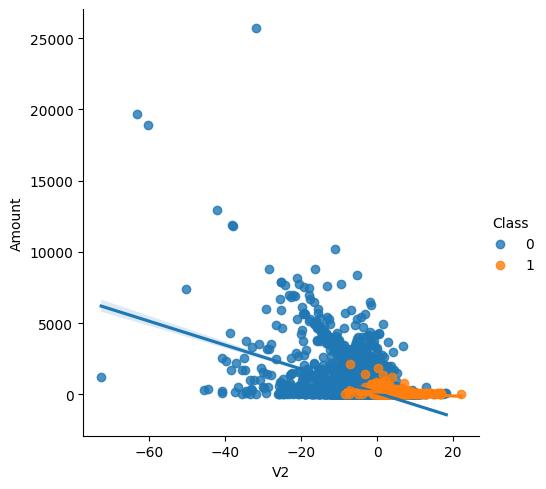

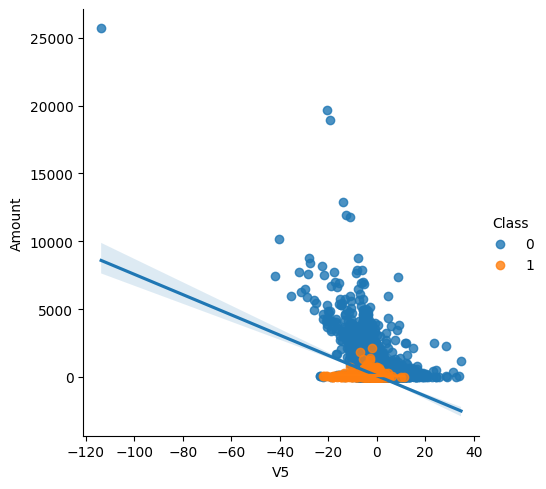

In [13]:
# Create individual lmplots for posetive correlation

sns.lmplot(x='V2', y='Amount', data=cc_train_copy, hue='Class', fit_reg=True)
sns.lmplot(x='V5', y='Amount', data=cc_train_copy, hue='Class', fit_reg=True)


We can confirm that the two couples of features are inverse correlated (the regression lines for Class = 0 have a negative slope while the regression lines for Class = 1 have a very small negative slope).

/var/folders/76/1yzscp4d71l1rljcgf5sbbfm0000gn/T/ipykernel_29813/3515082216.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cc_train_copy_0[col], label = 'class=Non-Fraud',color='green')
/var/folders/76/1yzscp4d71l1rljcgf5sbbfm0000gn/T/ipykernel_29813/3515082216.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cc_train_copy_1[col], label = 'Class=Fraud',color='red')


<Figure size 640x480 with 0 Axes>

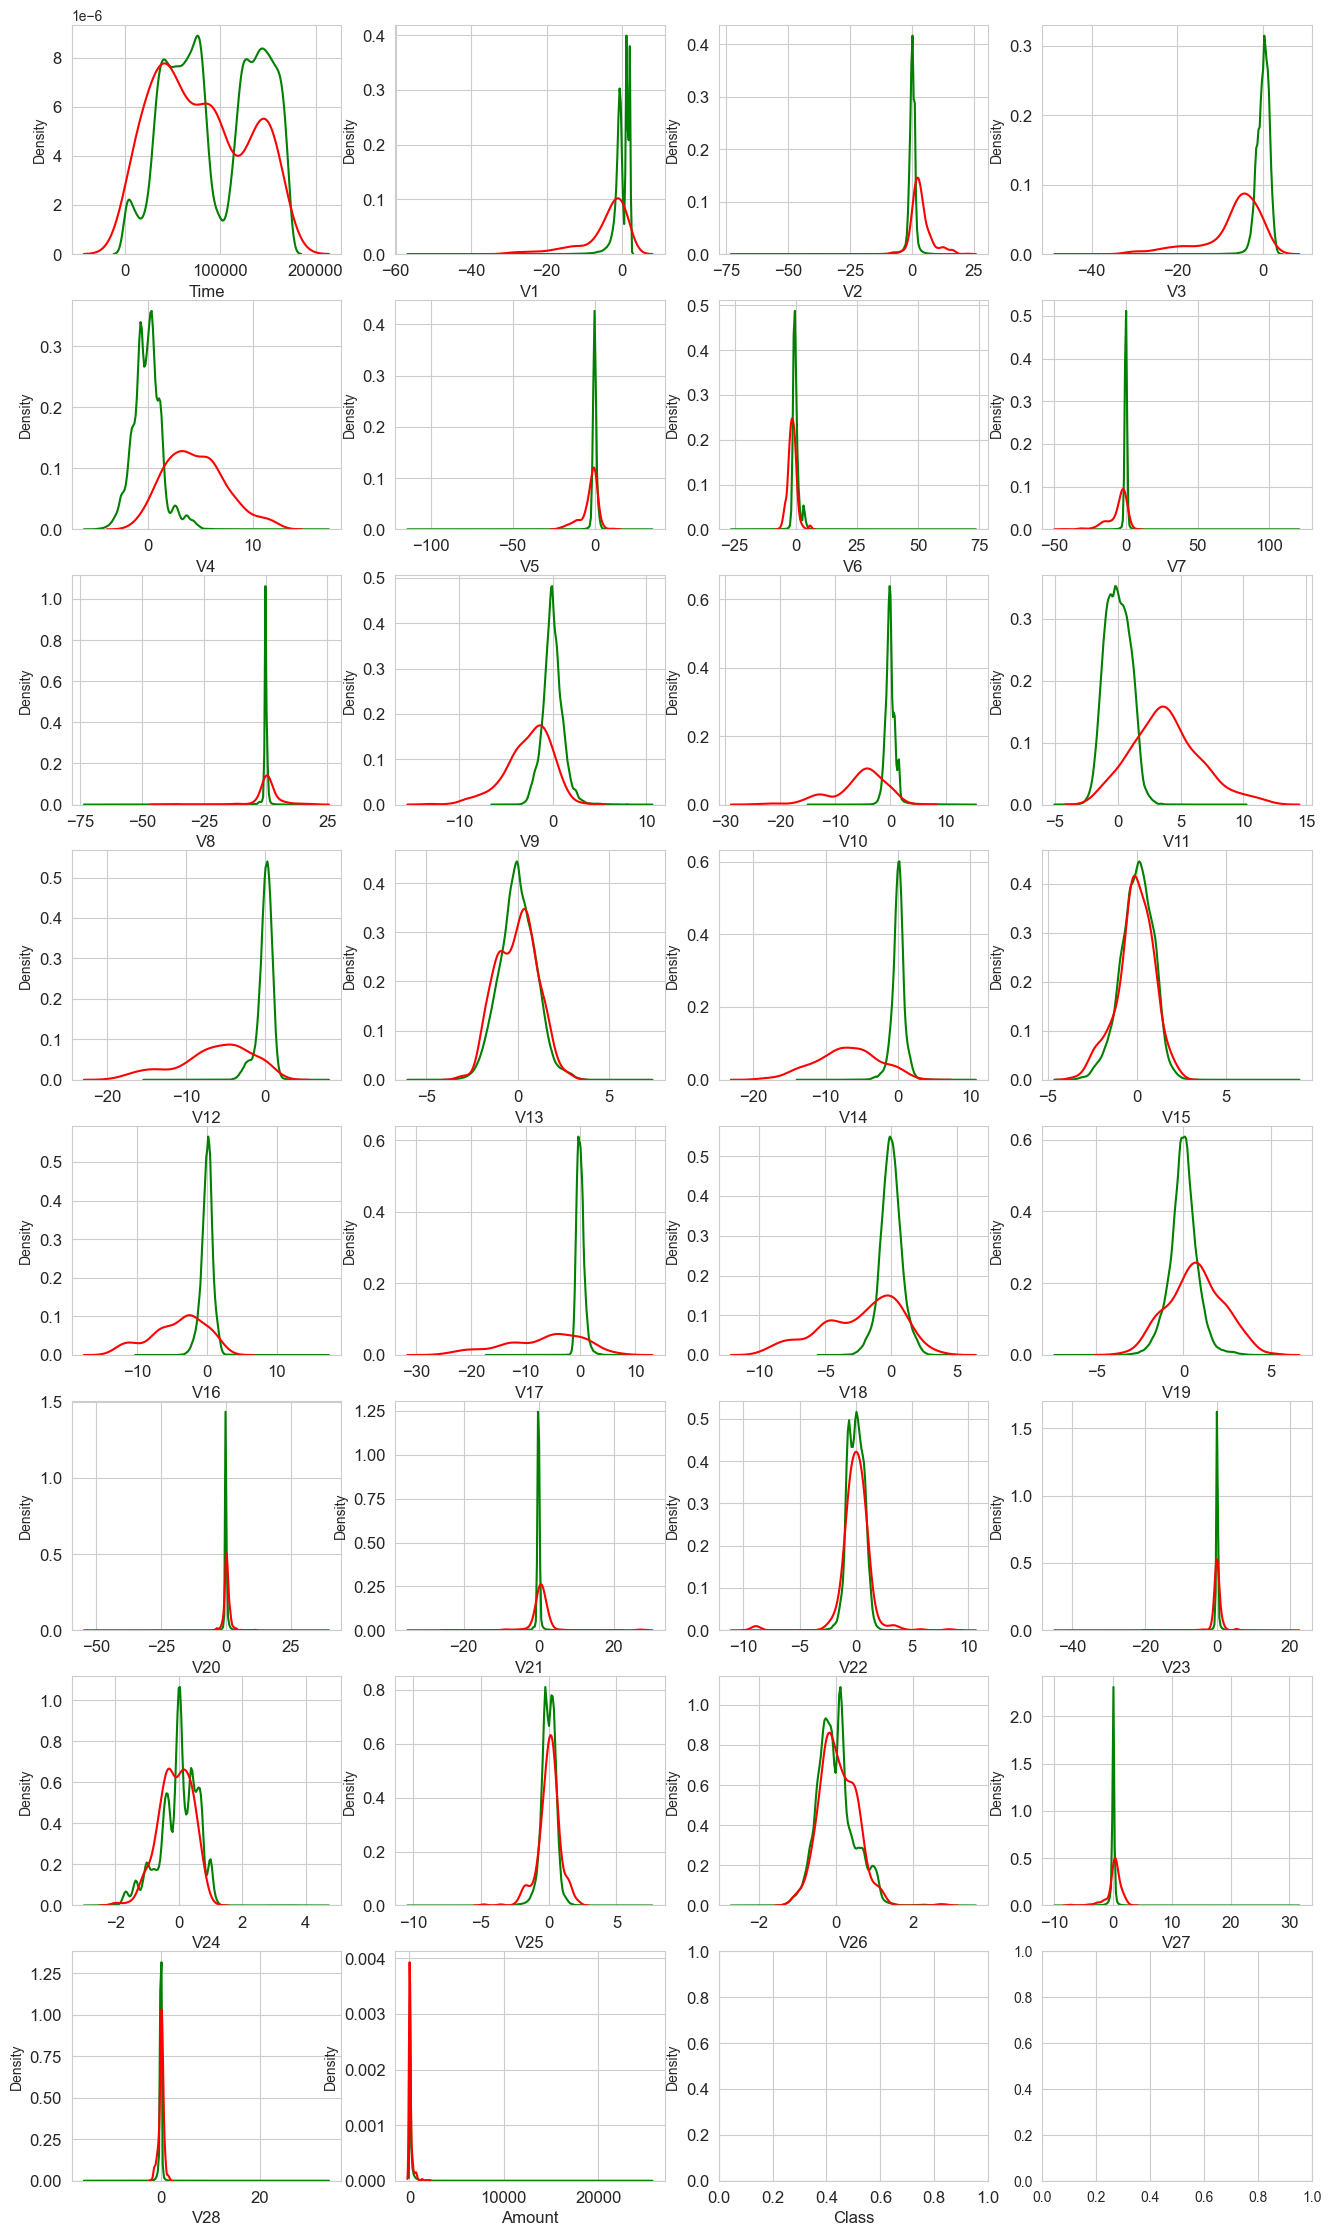

In [14]:
# Let's see distribution of each feature with target value

cc_train_copy_0 = cc_train_copy.loc[cc_train_copy['Class']==0]
cc_train_copy_1 = cc_train_copy.loc[cc_train_copy['Class']==1]
features=cc_train_copy.columns.values


sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))
i = 0
for col in features:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(cc_train_copy_0[col], label = 'class=Non-Fraud',color='green')
    sns.kdeplot(cc_train_copy_1[col], label = 'Class=Fraud',color='red')
    plt.xlabel(col, fontsize=12)
    locs , labesl = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In general, the features distribution for legitimate transactions is centered around 0, (exceptions for Time), 

## 🛠️ Data Preprocessing  

1. Outliers handler

2. Fix skewness

3. Scale the columns of 'Time' and 'Amount' . (Time and amount should be scaled as the other columns.)

In [16]:
# 3
from sklearn.preprocessing import StandardScaler, RobustScaler
std_scaler = StandardScaler()
balanced_df['scaled_amount']=std_scaler.fit_transform(balanced_df['Amount'].values.reshape(-1,1))
balanced_df['scaled_time']=std_scaler.fit_transform(balanced_df['Time'].values.reshape(-1,1))
balanced_df.drop(['Time','Amount'],axis=1,inplace=True)

In [20]:
def handle_skewness(df, feat_with_skewness=['V1', 'V3','V4','V5','V7','V11','V12','V14','V16','V17','V18','V22','V24','V26']):

    if set(feat_with_skewness).issubset(df.columns):
        # Handle skewness with cubic root transformation
        df[feat_with_skewness] = np.cbrt(df[feat_with_skewness])
    else:
        print("One or more features are not in the dataframe")
    
    return df

balanced_df = handle_skewness(balanced_df)

## 📈 Model Training